# JCT 可変複数裏付け（取引ごとに独立）

## 設定

In [1]:
import sys
sys.path.append('../')

from datetime import date, timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
from scripts.simulator import VariableLocalTransaction
from scripts.variableLocal import AutoAdjustmentTransaction
from scripts.exec_simulator import ExecuteAutoAdjustmentTransaction
from scripts.price_data.get_price import GetPriceData
from scripts.visualizer import LogVisualizer

price_getter = GetPriceData()

from pprint import pprint

## JCT ポートフォリオ

In [2]:
# a. 国内出来高
jct_portfolio_a = {
    'JPY': {
        'num': 100000000,
        'is_usd': False,
        'priority': 10,
    },
    '8306.T': {
        'num': 2000000,
        'is_usd': False,
        'priority': 1,
    },
    '8604.T': {
        'num': 100000,
        'is_usd': False,
        'priority': 0,
    }
}

# b. 円安（GAFAM）
jct_portfolio_b = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# c. グロース（マザーズ）
jct_portfolio_c = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 100000,
        'is_usd': False
    }
}

# d. 時価総額上位
jct_portfolio_d = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '9984.T': {
        'num': 10000,
        'is_usd': False
    },
    '6098.T': {
        'num': 10000,
        'is_usd': False
    },
    '6758.T': {
        'num': 5000,
        'is_usd': False
    }
}

# e. ボラティリティ
jct_portfolio_e = {
    'JPY': {
        'num': 100000000,
        'is_usd': False
    },
    '1306.T': {
        'num': 50000,
        'is_usd': False
    },
    'IVV': {
        'num': 300,
        'is_usd': True
    }
}

### ST ポートフォリオ

In [3]:
# a. 国内出来高
st_portfolio_a = {
    '7203.T': {
        'num': 70000,
        'is_usd': False
    },
    '9501.T': {
        'num': 200000,
        'is_usd': False
    },
    '4689.T': {
        'num': 120000,
        'is_usd': False
    }
}

# b. 円安（GAFAM）
st_portfolio_b = {
    'GOOGL': {
        'num': 150,
        'is_usd': True
    },
    'AMZN': {
        'num': 150,
        'is_usd': True
    },
    'FB': {
        'num': 1500,
        'is_usd': True
    },
    'AAPL': {
        'num': 4000,
        'is_usd': True
    },
    'MSFT': {
        'num': 2000,
        'is_usd': True
    },
}

# c. グロース（マザーズ）
st_portfolio_c = {
    '4385.T': {
        'num': 10000,
        'is_usd': False
    },
    '4477.T': {
        'num': 100000,
        'is_usd': False
    },
    '2158.T': {
        'num': 15000,
        'is_usd': False
    },
    '3994.T': {
        'num': 10000,
        'is_usd': False
    }
}

# d. 時価総額上位
st_portfolio_d = {
    '7203.T': {
        'num': 65000,
        'is_usd': False
    },
    '9983.T': {
        'num': 1000,
        'is_usd': False
    },
    '6861.T': {
        'num': 1000,
        'is_usd': False
    }
}

# e. ボラティリティ
st_portfolio_e = {
    'TSLA': {
        'num': 750,
        'is_usd': True
    },
    'NVDA': {
        'num': 2000,
        'is_usd': True
    },
    '6195.T': {
        'num': 100000,
        'is_usd': False
    },
    '6920.T': {
        'num': 2500,
        'is_usd': False
    }
}

# NVIDIA
st_portfolio_f = {
    'NVDA': {
        'num': 5000,
        'is_usd': True
    },
    'AAPL': {
        'num': 4000,
        'is_usd': True
    },
}

## シミュレーション（不足分自動現金補填）

### use Transaction

In [44]:
from datetime import date, timedelta
def date_range(start_date, end_date):
    for n in range(int((end_date - start_date).days)):
        yield start_date + timedelta(n)

transaction = AutoAdjustmentTransaction(jct_portfolio_a, st_portfolio_f, date(2022, 9, 1), lender_loan_ratio=1.05, print_log=True, auto_deposit=True, is_dummy_data=False)


print('Start simulation...')
print('='*50)
for date in date_range(date(2022, 9, 2), date(2022, 10, 1)):
    print('='*50)
    print(date)
    transaction.check_diff_and_margin_call(date)
    print('='*50)
print('='*50)
print('Finished.')

("JCT portfolio: {'JPY': {'num': 100000000, 'is_usd': False, 'priority': 10}, "
 "'8306.T': {'num': 2000000, 'is_usd': False, 'priority': 1}, '8604.T': "
 "{'num': 100000, 'is_usd': False, 'priority': 0}}")
("ST portfolio: {'NVDA': {'num': 5000, 'is_usd': True}, 'AAPL': {'num': 4000, "
 "'is_usd': True}}")
2022-09-01: Price updating...
NVDA: 20940.5
AAPL: 21811.7
2022-09-01: Price updating...
JPY: 1.0
8306.T: 715.7
8604.T: 499.8
"JPY: {'num': 100000000, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 2000000, 'is_usd': False, 'priority': 1, 'price': 715.7}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141885,
                                      'price': 715.7,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
        

AAPL: 22427.3
2022-09-15: Price updating...
JPY: 1.0
8306.T: 723.5
8604.T: 505.7
from Borrower(A) to Lender(B)
"JPY: {'num': 16044798, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
2022-09-16
2022-09-16: Price updating...
NVDA: 18478.5
AAPL: 21777.1
2022-09-16: Price updating...
JPY: 1.0
8306.T: 731.2
8604.T: 504.7
from Lender(B) to Borrower(A)
"JPY: {'num': 87502727, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
2022-09-17
2022-09-17: Price updating...
NVDA: 18921.3
AAPL: 21605.1
2022-09-17: Price updating...
JPY: 1.0
8306.T: 733.7
8604.T: 505.5
from Borrower(A) to Lender(B)
"JPY: {'num': 18872259, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
2022-09-18
2022-09-18: Price updating...
NVDA: 19104.8
AAPL: 22054.3

### use Executor

In [10]:
from datetime import date, timedelta
simulator = ExecuteAutoAdjustmentTransaction(jct_portfolio_a, st_portfolio_f, date(2022, 6, 1), date(2022,10,1),  options={
    'lender_loan_ratio': 1.05,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': False
})
print('Start simulation...')
logs = simulator.execute()
print("End simulation...")

simulator_reverse = ExecuteAutoAdjustmentTransaction(jct_portfolio_a, st_portfolio_f, date(2022, 6, 1), date(2022,10,1),  options={
    'lender_loan_ratio': 1.05,
    'print_log': True,
    'auto_deposit': True,
    'is_dummy_data': False,
    'is_reverse': True
})

print('Start simulation REVERSE...')
logs_reverse = simulator_reverse.execute()
print("End simulation REVERSE...")

("JCT portfolio: {'JPY': {'num': 100000000, 'is_usd': False, 'priority': 10}, "
 "'8306.T': {'num': 2000000, 'is_usd': False, 'priority': 1}, '8604.T': "
 "{'num': 100000, 'is_usd': False, 'priority': 0}}")
("ST portfolio: {'NVDA': {'num': 5000, 'is_usd': True}, 'AAPL': {'num': 4000, "
 "'is_usd': True}}")
2022-06-01: Price updating...
NVDA: 23859.8
AAPL: 19019.3
2022-06-01: Price updating...
JPY: 1.0
8306.T: 745.5
8604.T: 513.5
"JPY: {'num': 100000000, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 2000000, 'is_usd': False, 'priority': 1, 'price': 745.5}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141040,
                                      'price': 745.5,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
        

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-06-14
2022-06-14: Price updating...
NVDA: 21094.3
AAPL: 17779.2
2022-06-14: Price updating...
JPY: 1.0
8306.T: 732.5
8604.T: 487.1
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1883927, 'is_usd': False, 'priority': 1, 'price': 732.5}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-06-15
2022-06-15: Price updating...
NVDA: 21255.8
AAPL: 17819.7
2022-06-15: Price updating...
JPY: 1.0
8306.T: 740.2
8604.T: 490.0
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 188338

8306.T: 741.4
8604.T: 495.7
from Lender(B) to Borrower(A)
"8306.T: {'num': 134969, 'is_usd': False, 'price': 741.4, 'priority': 1}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-06-30
2022-06-30: Price updating...
NVDA: 21144.4
AAPL: 18941.8
2022-06-30: Price updating...
JPY: 1.0
8306.T: 729.4
8604.T: 495.8
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1876158, 'is_usd': False, 'priority': 1, 'price': 729.4}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-07-01
2022-07-01: Price updating...
NVDA: 20705.5
A

NVDA: 21156.1
AAPL: 20433.6
2022-07-15: Price updating...
JPY: 1.0
8306.T: 700.7
8604.T: 500.7
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1871440, 'is_usd': False, 'priority': 1, 'price': 700.7}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-07-16
2022-07-16: Price updating...
NVDA: 21903.9
AAPL: 20868.6
2022-07-16: Price updating...
JPY: 1.0
8306.T: 717.2
8604.T: 510.2
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1861723, 'is_usd': False, 'priority': 1, 'price': 717.2}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-07-31
2022-07-31: Price updating...
NVDA: 24601.5
AAPL: 21546.5
2022-07-31: Price updating...
JPY: 1.0
8306.T: 749.0
8604.T: 509.0
from Lender(B) to Borrower(A)
"8306.T: {'num': 160063, 'is_usd': False, 'price': 749.0, 'priority': 1}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-08-01
2022-08-01: Price updating...
NVDA: 24601.5
AAPL: 21546.5
2022-08-01: Price updating...
JPY: 1.0
8306.T: 749.0
8604.T: 509.0
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1840250, 'is_usd': False, 'priority': 1, 'price': 749.0}"
@@@@@@@@@@@@@@

NVDA: 25367.3
AAPL: 23084.1
2022-08-15: Price updating...
JPY: 1.0
8306.T: 726.2
8604.T: 507.6
from Lender(B) to Borrower(A)
"8306.T: {'num': 179196, 'is_usd': False, 'price': 726.2, 'priority': 1}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-08-16
2022-08-16: Price updating...
NVDA: 25367.3
AAPL: 23084.1
2022-08-16: Price updating...
JPY: 1.0
8306.T: 725.2
8604.T: 507.1
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1820805, 'is_usd': False, 'priority': 1, 'price': 725.2}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

NVDA: 21438.0
AAPL: 22024.2
2022-08-31: Price updating...
JPY: 1.0
8306.T: 721.0
8604.T: 503.7
from Lender(B) to Borrower(A)
"8306.T: {'num': 147335, 'is_usd': False, 'price': 721.0, 'priority': 1}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-01
2022-09-01: Price updating...
NVDA: 20940.5
AAPL: 21811.7
2022-09-01: Price updating...
JPY: 1.0
8306.T: 715.7
8604.T: 499.8
from Lender(B) to Borrower(A)
"8306.T: {'num': 145701, 'is_usd': False, 'price': 715.7, 'priority': 1}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-02
2022-09-02: Price updating...
NVDA: 19413.6


NVDA: 18478.5
AAPL: 21777.1
2022-09-16: Price updating...
JPY: 1.0
8306.T: 731.2
8604.T: 504.7
from Lender(B) to Borrower(A)
"8306.T: {'num': 129538, 'is_usd': False, 'price': 731.2, 'priority': 1}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-17
2022-09-17: Price updating...
NVDA: 18921.3
AAPL: 21605.1
2022-09-17: Price updating...
JPY: 1.0
8306.T: 733.7
8604.T: 505.5
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1878999, 'is_usd': False, 'priority': 1, 'price': 733.7}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

8306.T: 745.5
8604.T: 513.5
"JPY: {'num': 100000000, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 2000000, 'is_usd': False, 'priority': 1, 'price': 745.5}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
Transaction is created.
{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141040,
                                      'price': 745.5,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
                                   'price': 1.0,
                                   'priority': 10}}],
 'date': [datetime.date(2022, 6, 1)],
 'initial_collateral_portfolio': [{'8306.T': {'is_usd': False,
                                              'num': 141040,
                                              'price': 745.5,
                                              'priority': 1},
                        

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-06-15
2022-06-15: Price updating...
NVDA: 21255.8
AAPL: 17819.7
2022-06-15: Price updating...
JPY: 1.0
8306.T: 740.2
8604.T: 490.0
from Lender(B) to Borrower(A)
"JPY: {'num': 70072405, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-06-16
2022-06-16: Price updating...
NVDA: 22360.0
AAPL: 18322.8
2022-06-16: Price updating...
JPY: 1.0
8306.T: 747.2
8604.T: 494.6
from Borrower(A) to Lender(B)
"JPY: {'num': 30122124, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is 

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-07-02
2022-07-02: Price updating...
NVDA: 19720.1
AAPL: 18864.7
2022-07-02: Price updating...
JPY: 1.0
8306.T: 734.7
8604.T: 503.2
from Lender(B) to Borrower(A)
"JPY: {'num': 72499651, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-07-03
2022-07-03: Price updating...
NVDA: 20207.8
AAPL: 19116.6
2022-07-03: Price updating...
JPY: 1.0
8306.T: 734.7
8604.T: 503.2
from Borrower(A) to Lender(B)
"JPY: {'num': 32929475, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is 

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-07-19
2022-07-19: Price updating...
NVDA: 22269.9
AAPL: 20341.8
2022-07-19: Price updating...
JPY: 1.0
8306.T: 717.2
8604.T: 510.2
from Lender(B) to Borrower(A)
"JPY: {'num': 89416486, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-07-20
2022-07-20: Price updating...
NVDA: 23487.8
AAPL: 20872.5
2022-07-20: Price updating...
JPY: 1.0
8306.T: 727.4
8604.T: 517.0
from Borrower(A) to Lender(B)
"JPY: {'num': 10583515, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is 

2022-08-04: Price updating...
NVDA: 25199.2
AAPL: 22158.2
2022-08-04: Price updating...
JPY: 1.0
8306.T: 709.2
8604.T: 490.2
from Borrower(A) to Lender(B)
"JPY: {'num': 3510579, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1833978, 'is_usd': False, 'priority': 1, 'price': 709.2}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-08-05
2022-08-05: Price updating...
NVDA: 25740.7
AAPL: 22212.2
2022-08-05: Price updating...
JPY: 1.0
8306.T: 707.4
8604.T: 496.5
from Borrower(A) to Lender(B)
"JPY: {'num': 0, 'is_usd': False, 'priority': 10, 'price': 1.0}"
"8306.T: {'num': 1823237, 'is_usd': False, 'priority': 1, 'price': 707.4}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-08-21
2022-08-21: Price updating...
NVDA: 23343.5
AAPL: 22963.9
2022-08-21: Price updating...
JPY: 1.0
8306.T: 732.4
8604.T: 507.1
from Lender(B) to Borrower(A)
"JPY: {'num': 92104382, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-08-22
2022-08-22: Price updating...
NVDA: 23343.5
AAPL: 22963.9
2022-08-22: Price updating...
JPY: 1.0
8306.T: 732.4
8604.T: 507.1
from Borrower(A) to Lender(B)
"JPY: {'num': 13967663, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is 

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-07
2022-09-07: Price updating...
NVDA: 18908.8
AAPL: 21700.6
2022-09-07: Price updating...
JPY: 1.0
8306.T: 711.5
8604.T: 492.7
from Borrower(A) to Lender(B)
"JPY: {'num': 39900260, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-08
2022-09-08: Price updating...
NVDA: 19631.7
AAPL: 22325.8
2022-09-08: Price updating...
JPY: 1.0
8306.T: 726.2
8604.T: 500.7
from Borrower(A) to Lender(B)
"JPY: {'num': 38761239, 'is_usd': False, 'priority': 10, 'price': 1.0}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is 

OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-24
2022-09-24: Price updating...
NVDA: 17807.7
AAPL: 21403.1
2022-09-24: Price updating...
JPY: 1.0
8306.T: 687.2
8604.T: 488.7
from Lender(B) to Borrower(A)
"JPY: {'num': 62985914, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is moved.
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@
2022-09-25
2022-09-25: Price updating...
NVDA: 17548.5
AAPL: 21637.1
2022-09-25: Price updating...
JPY: 1.0
8306.T: 687.2
8604.T: 488.7
from Lender(B) to Borrower(A)
"JPY: {'num': 58620223, 'is_usd': False, 'price': 1.0, 'priority': 10}"
@@@@@@@@@@@@@@price adjustment is successfully done@@@@@@@@@@@@@@
OK. collateral is 

### ログの可視化

In [19]:
visualizer = LogVisualizer(logs)

Log Visualizer initialized.
{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141040,
                                      'price': 745.5,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
                                   'price': 1.0,
                                   'priority': 10}},
                          {'8306.T': {'is_usd': False,
                                      'num': 140672,
                                      'price': 740.9,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
                                   'price': 1.0,
                                   'priority': 10}},
                          {'8306.T': {'is_usd': False,
                                      'num': 157468,
                  

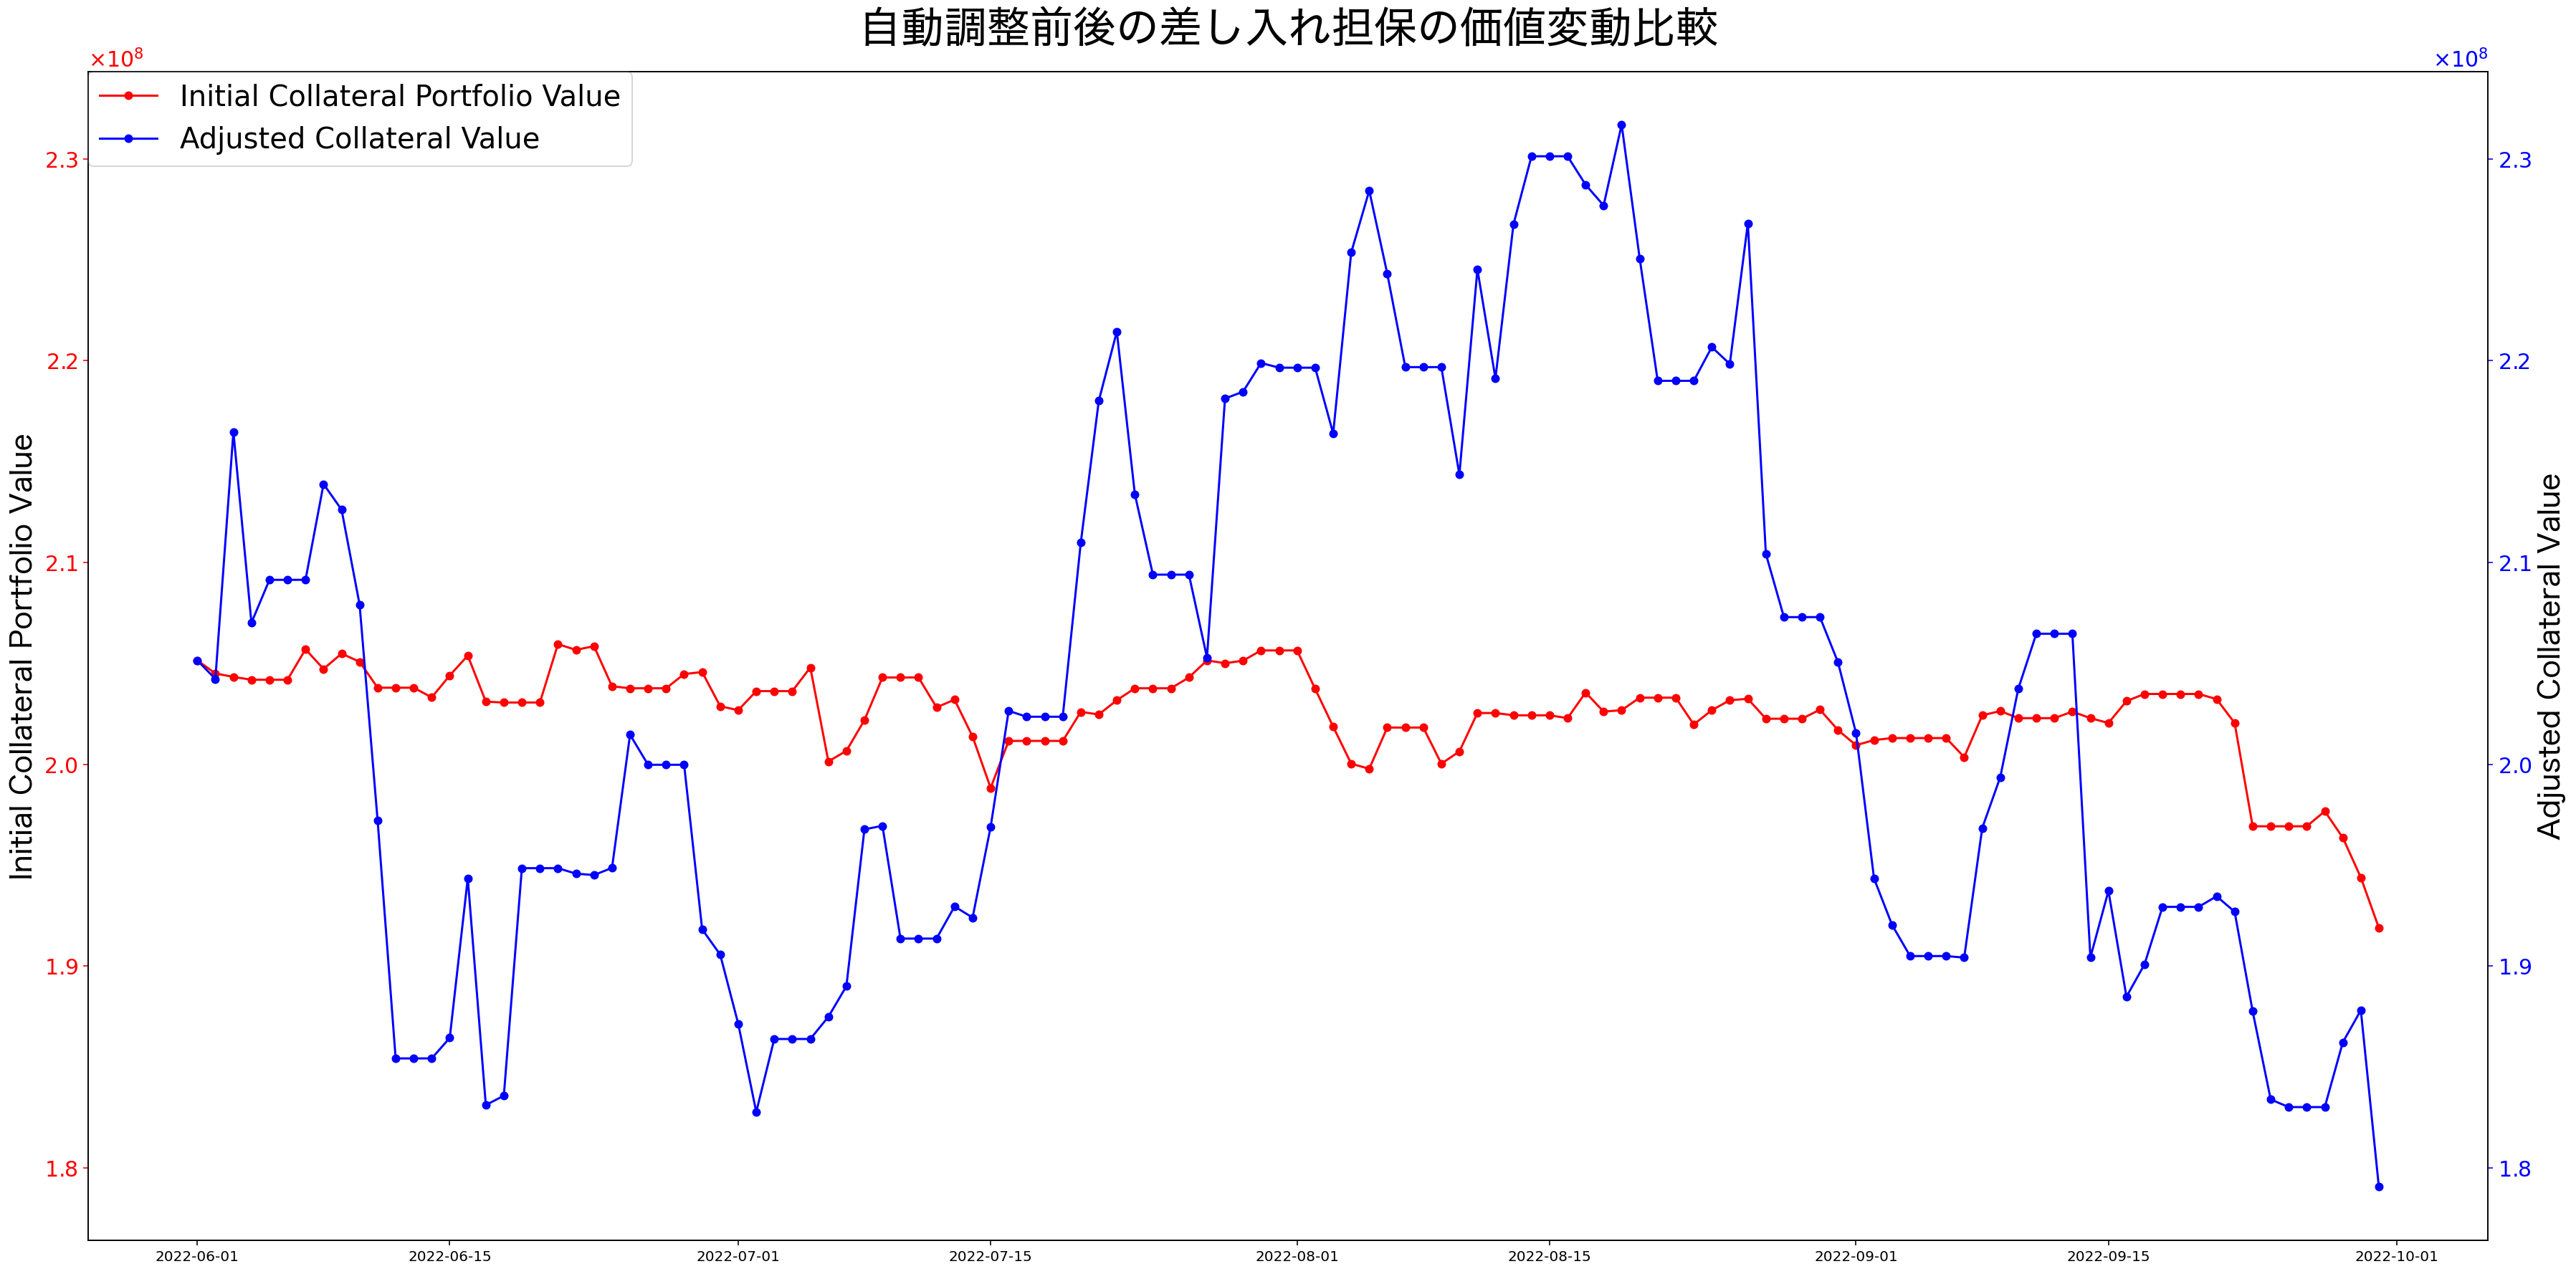

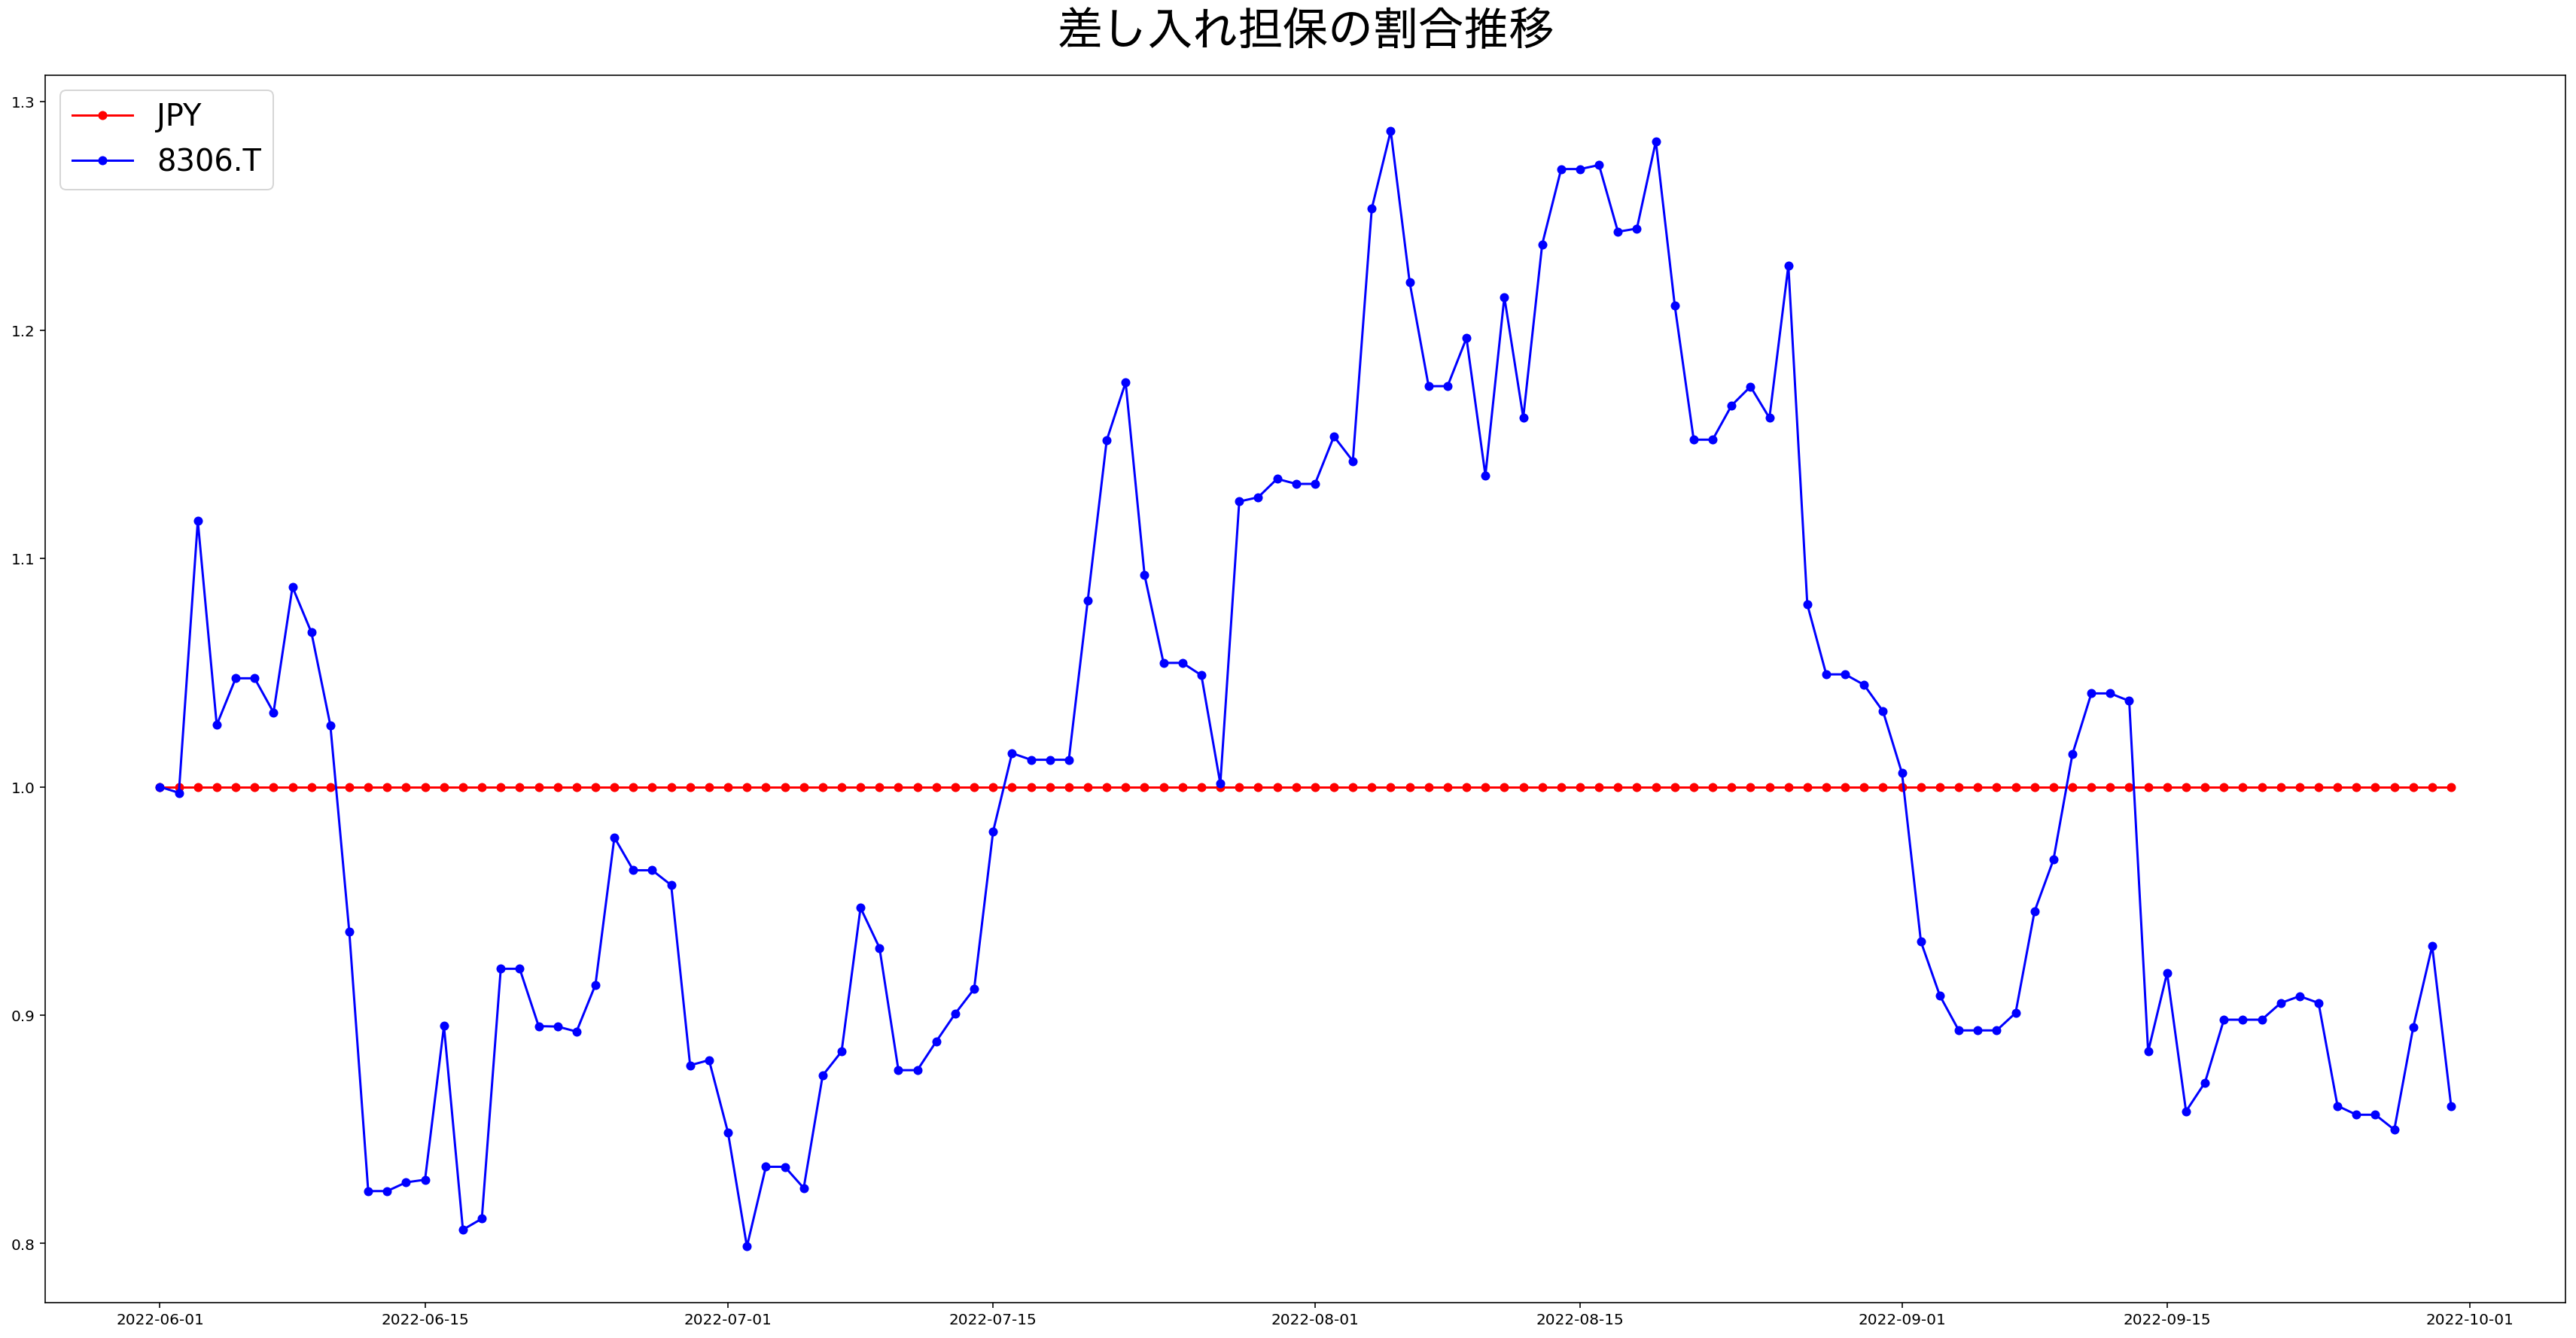

In [20]:
visualizer.compare_collateral_portfolio()
collateral_percentages = visualizer.calc_collateral_percentage()

In [16]:
collateral_percentages

{'JPY': [1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 '8306.T': [1.0,
  0.9973908111174135,
  1.1164775950085082,
  1.0270986954055588,
  1.0475326148610324,
  1.0475255246738513,
  1.0325652

In [22]:
visualizer_reverse = LogVisualizer(logs_reverse)

Log Visualizer initialized.
{'collateral_portfolio': [{'8306.T': {'is_usd': False,
                                      'num': 141040,
                                      'price': 745.5,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 100000000,
                                   'price': 1.0,
                                   'priority': 10}},
                          {'8306.T': {'is_usd': False,
                                      'num': 141040,
                                      'price': 740.9,
                                      'priority': 1},
                           'JPY': {'is_usd': False,
                                   'num': 99727624,
                                   'price': 1.0,
                                   'priority': 10}},
                          {'8306.T': {'is_usd': False,
                                      'num': 157468,
                   

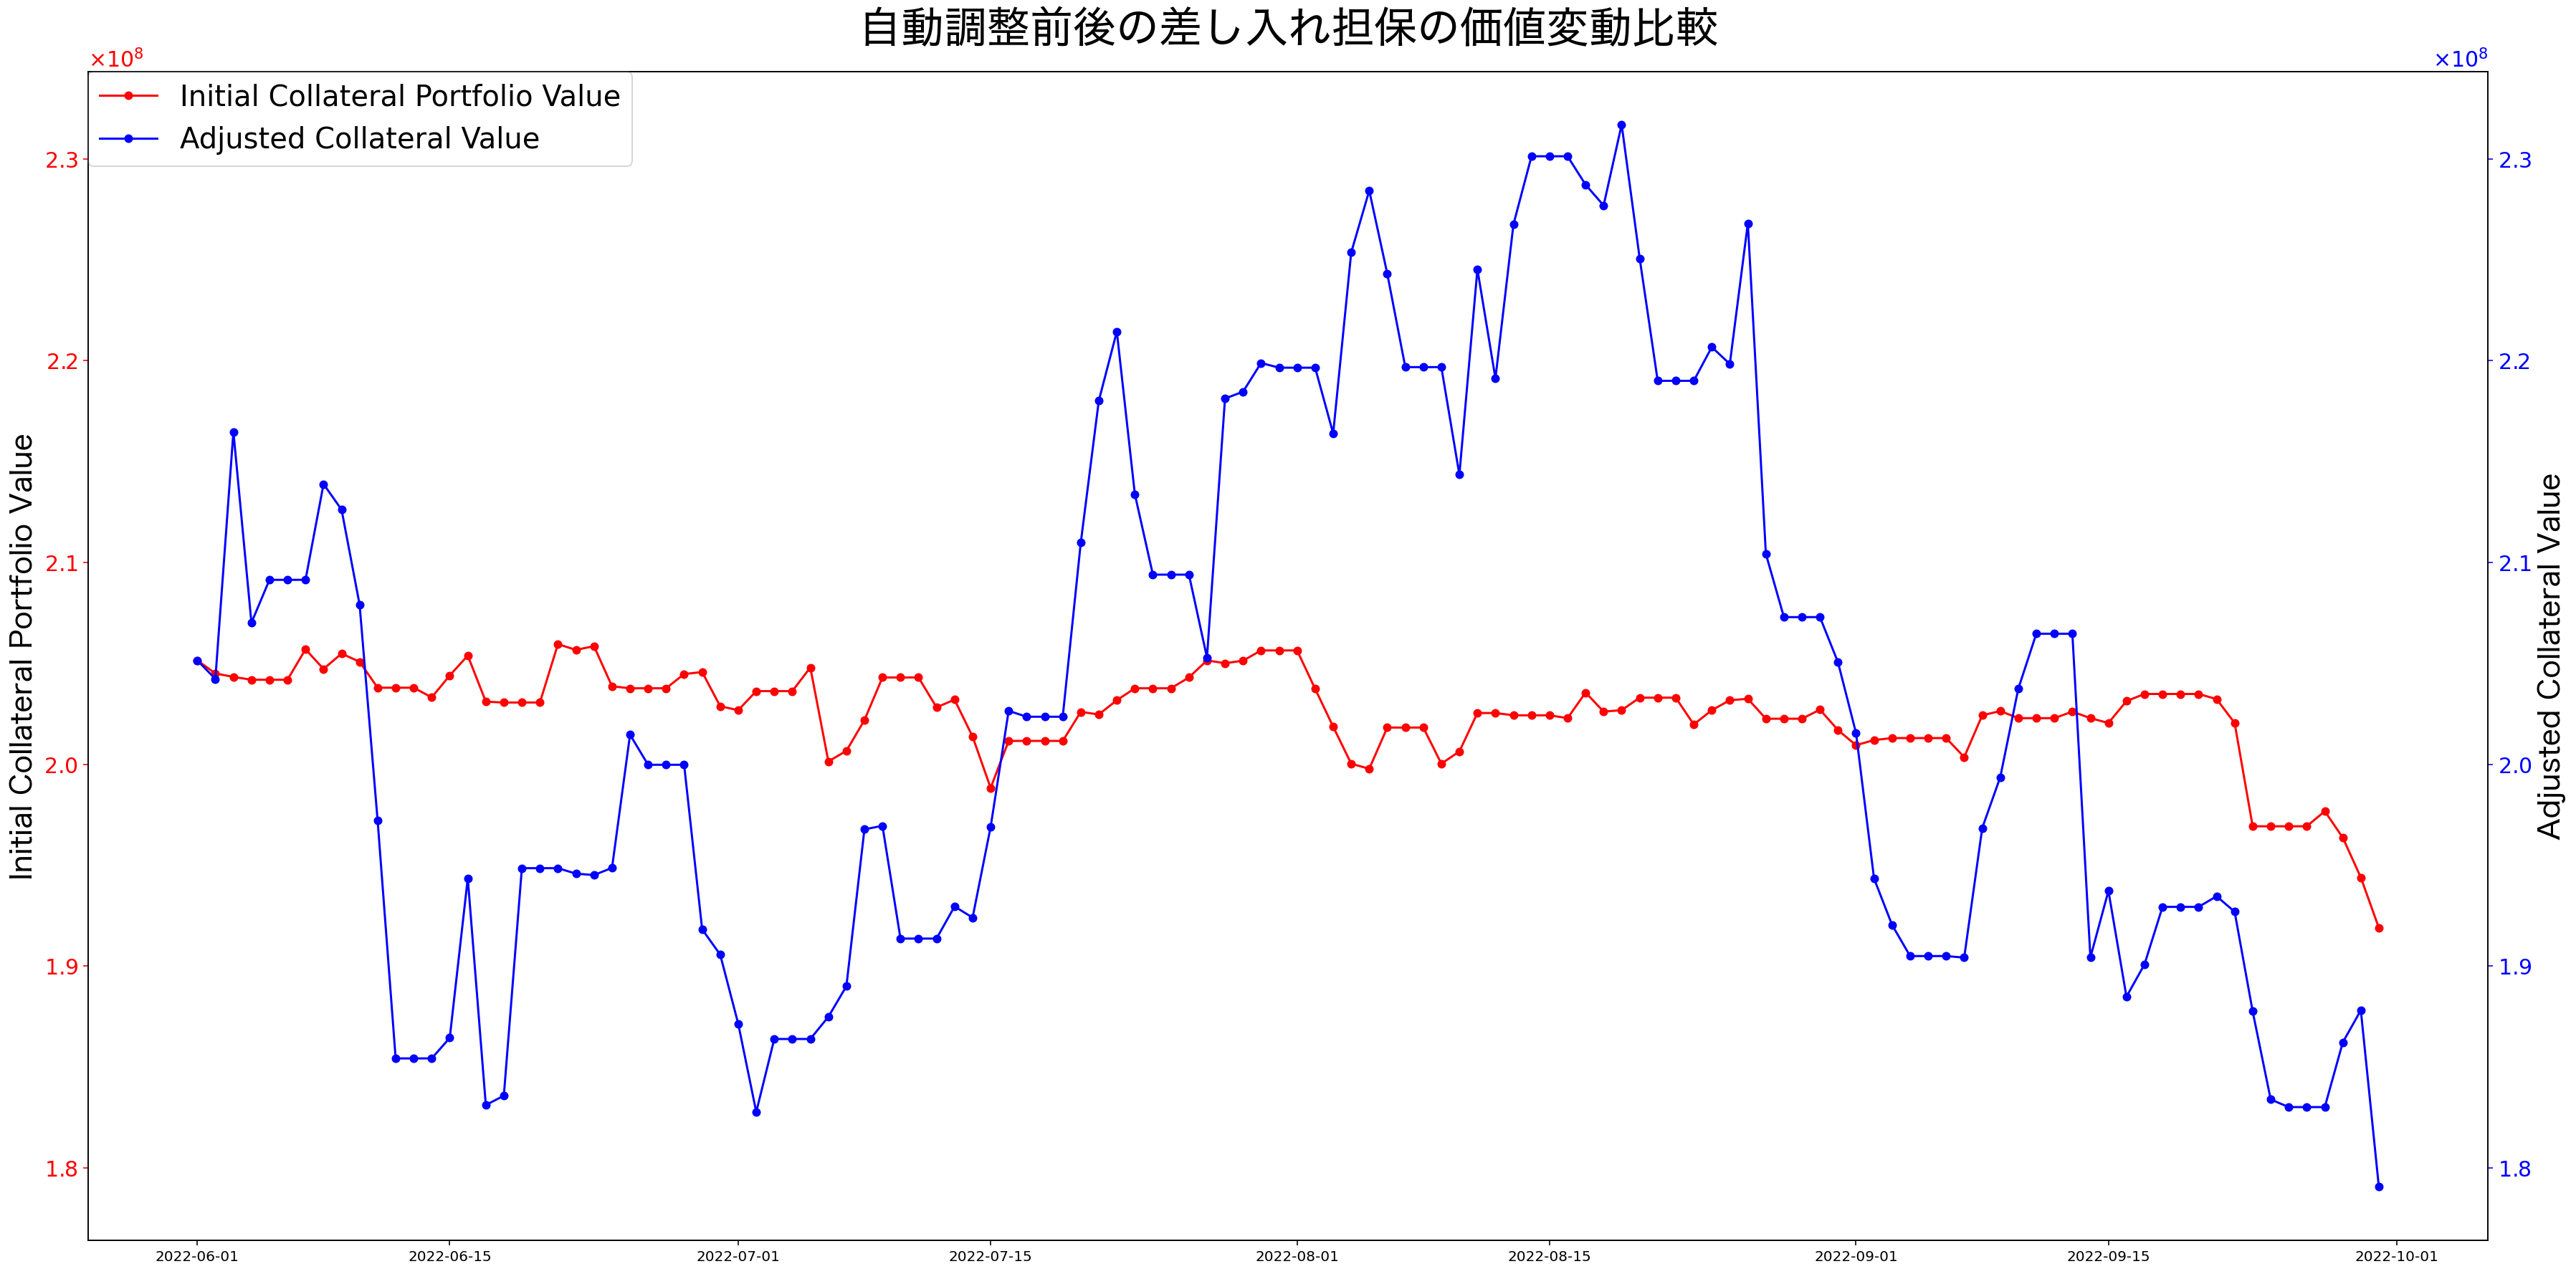

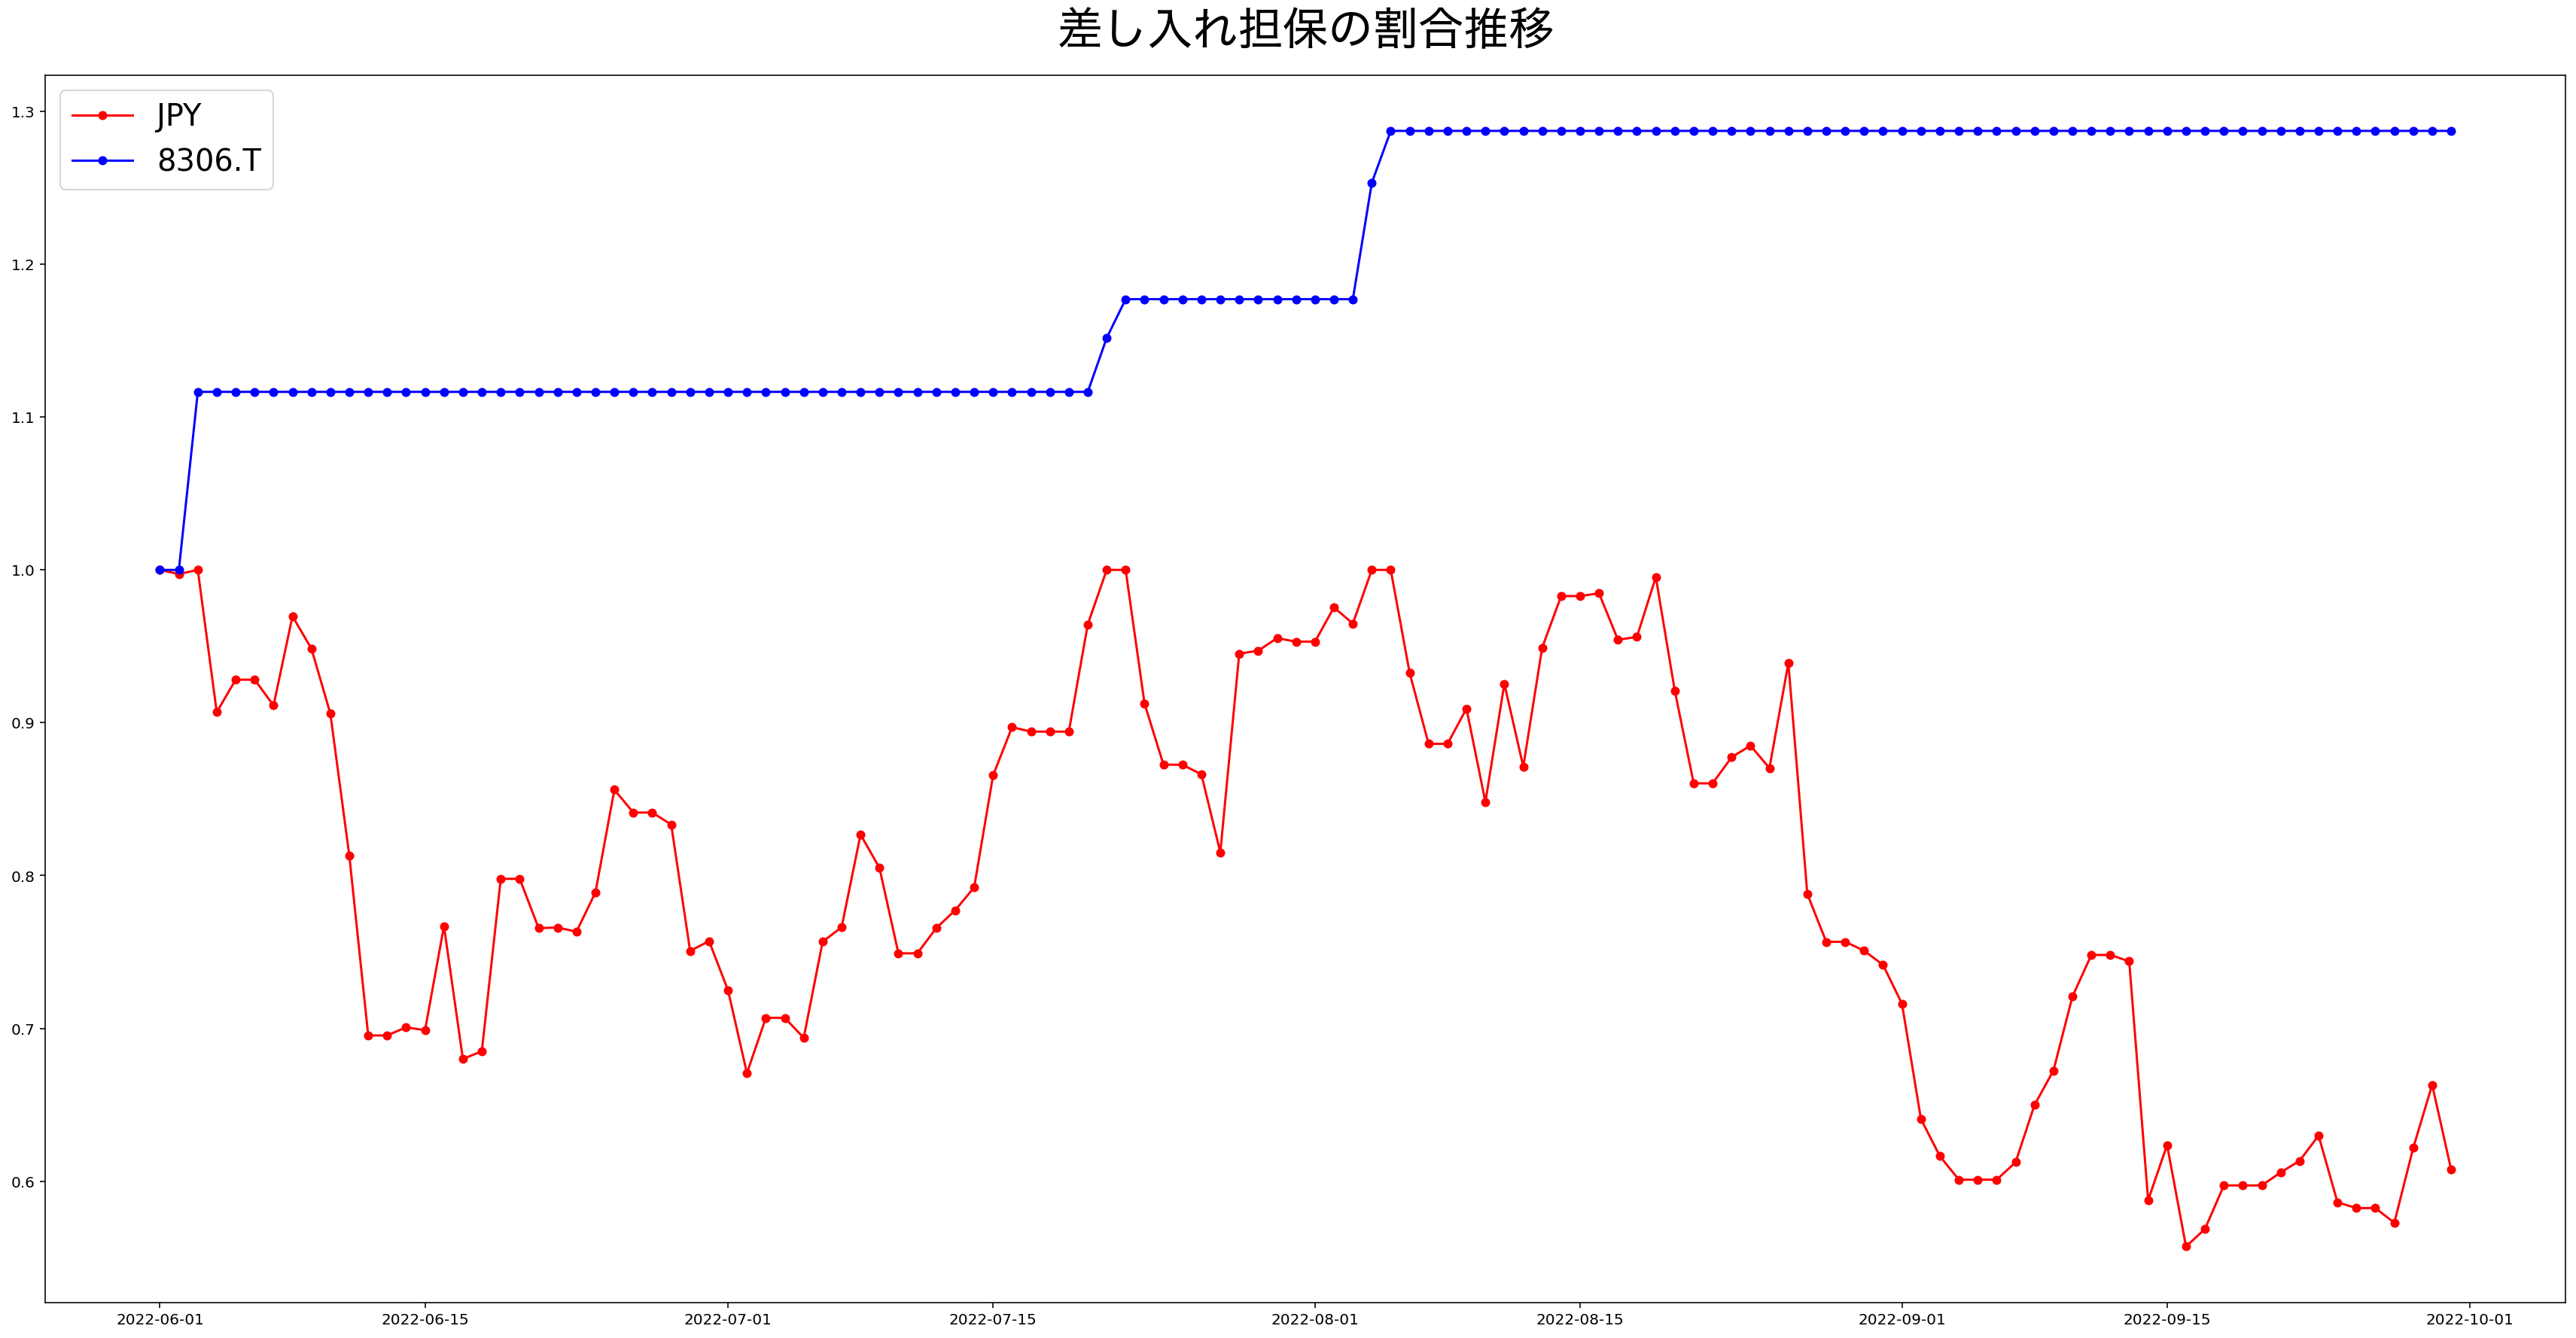

In [23]:
visualizer_reverse.compare_collateral_portfolio()
collateral_percentages_reverse = visualizer_reverse.calc_collateral_percentage()

In [24]:
collateral_percentages_reverse

{'JPY': [1.0,
  0.99727624,
  1.0,
  0.90688618,
  0.92816339,
  0.92816338,
  0.9113143,
  0.9696627,
  0.94844707,
  0.90596315,
  0.81321163,
  0.69537013,
  0.69537014,
  0.70072405,
  0.69877876,
  0.76685671,
  0.67997872,
  0.68506693,
  0.79785163,
  0.79785162,
  0.76557068,
  0.7659974,
  0.76326466,
  0.78900615,
  0.85612823,
  0.84122452,
  0.84122453,
  0.83335112,
  0.75069744,
  0.75706501,
  0.72499651,
  0.67070525,
  0.70688931,
  0.7068893,
  0.69381946,
  0.7567837,
  0.76610784,
  0.82685904,
  0.80498709,
  0.74909769,
  0.74909769,
  0.76563183,
  0.77730345,
  0.79223764,
  0.86552818,
  0.89707546,
  0.89416485,
  0.89416486,
  0.89416485,
  0.96433227,
  1.0,
  1.0,
  0.91240294,
  0.87252919,
  0.8725292,
  0.86622036,
  0.81518304,
  0.94519946,
  0.94709152,
  0.95536007,
  0.95302697,
  0.95302697,
  0.97543994,
  0.96489421,
  1.0,
  1.0,
  0.93250699,
  0.88618099,
  0.886181,
  0.90923823,
  0.84813869,
  0.92542444,
  0.87128644,
  0.94916102,
  0.982

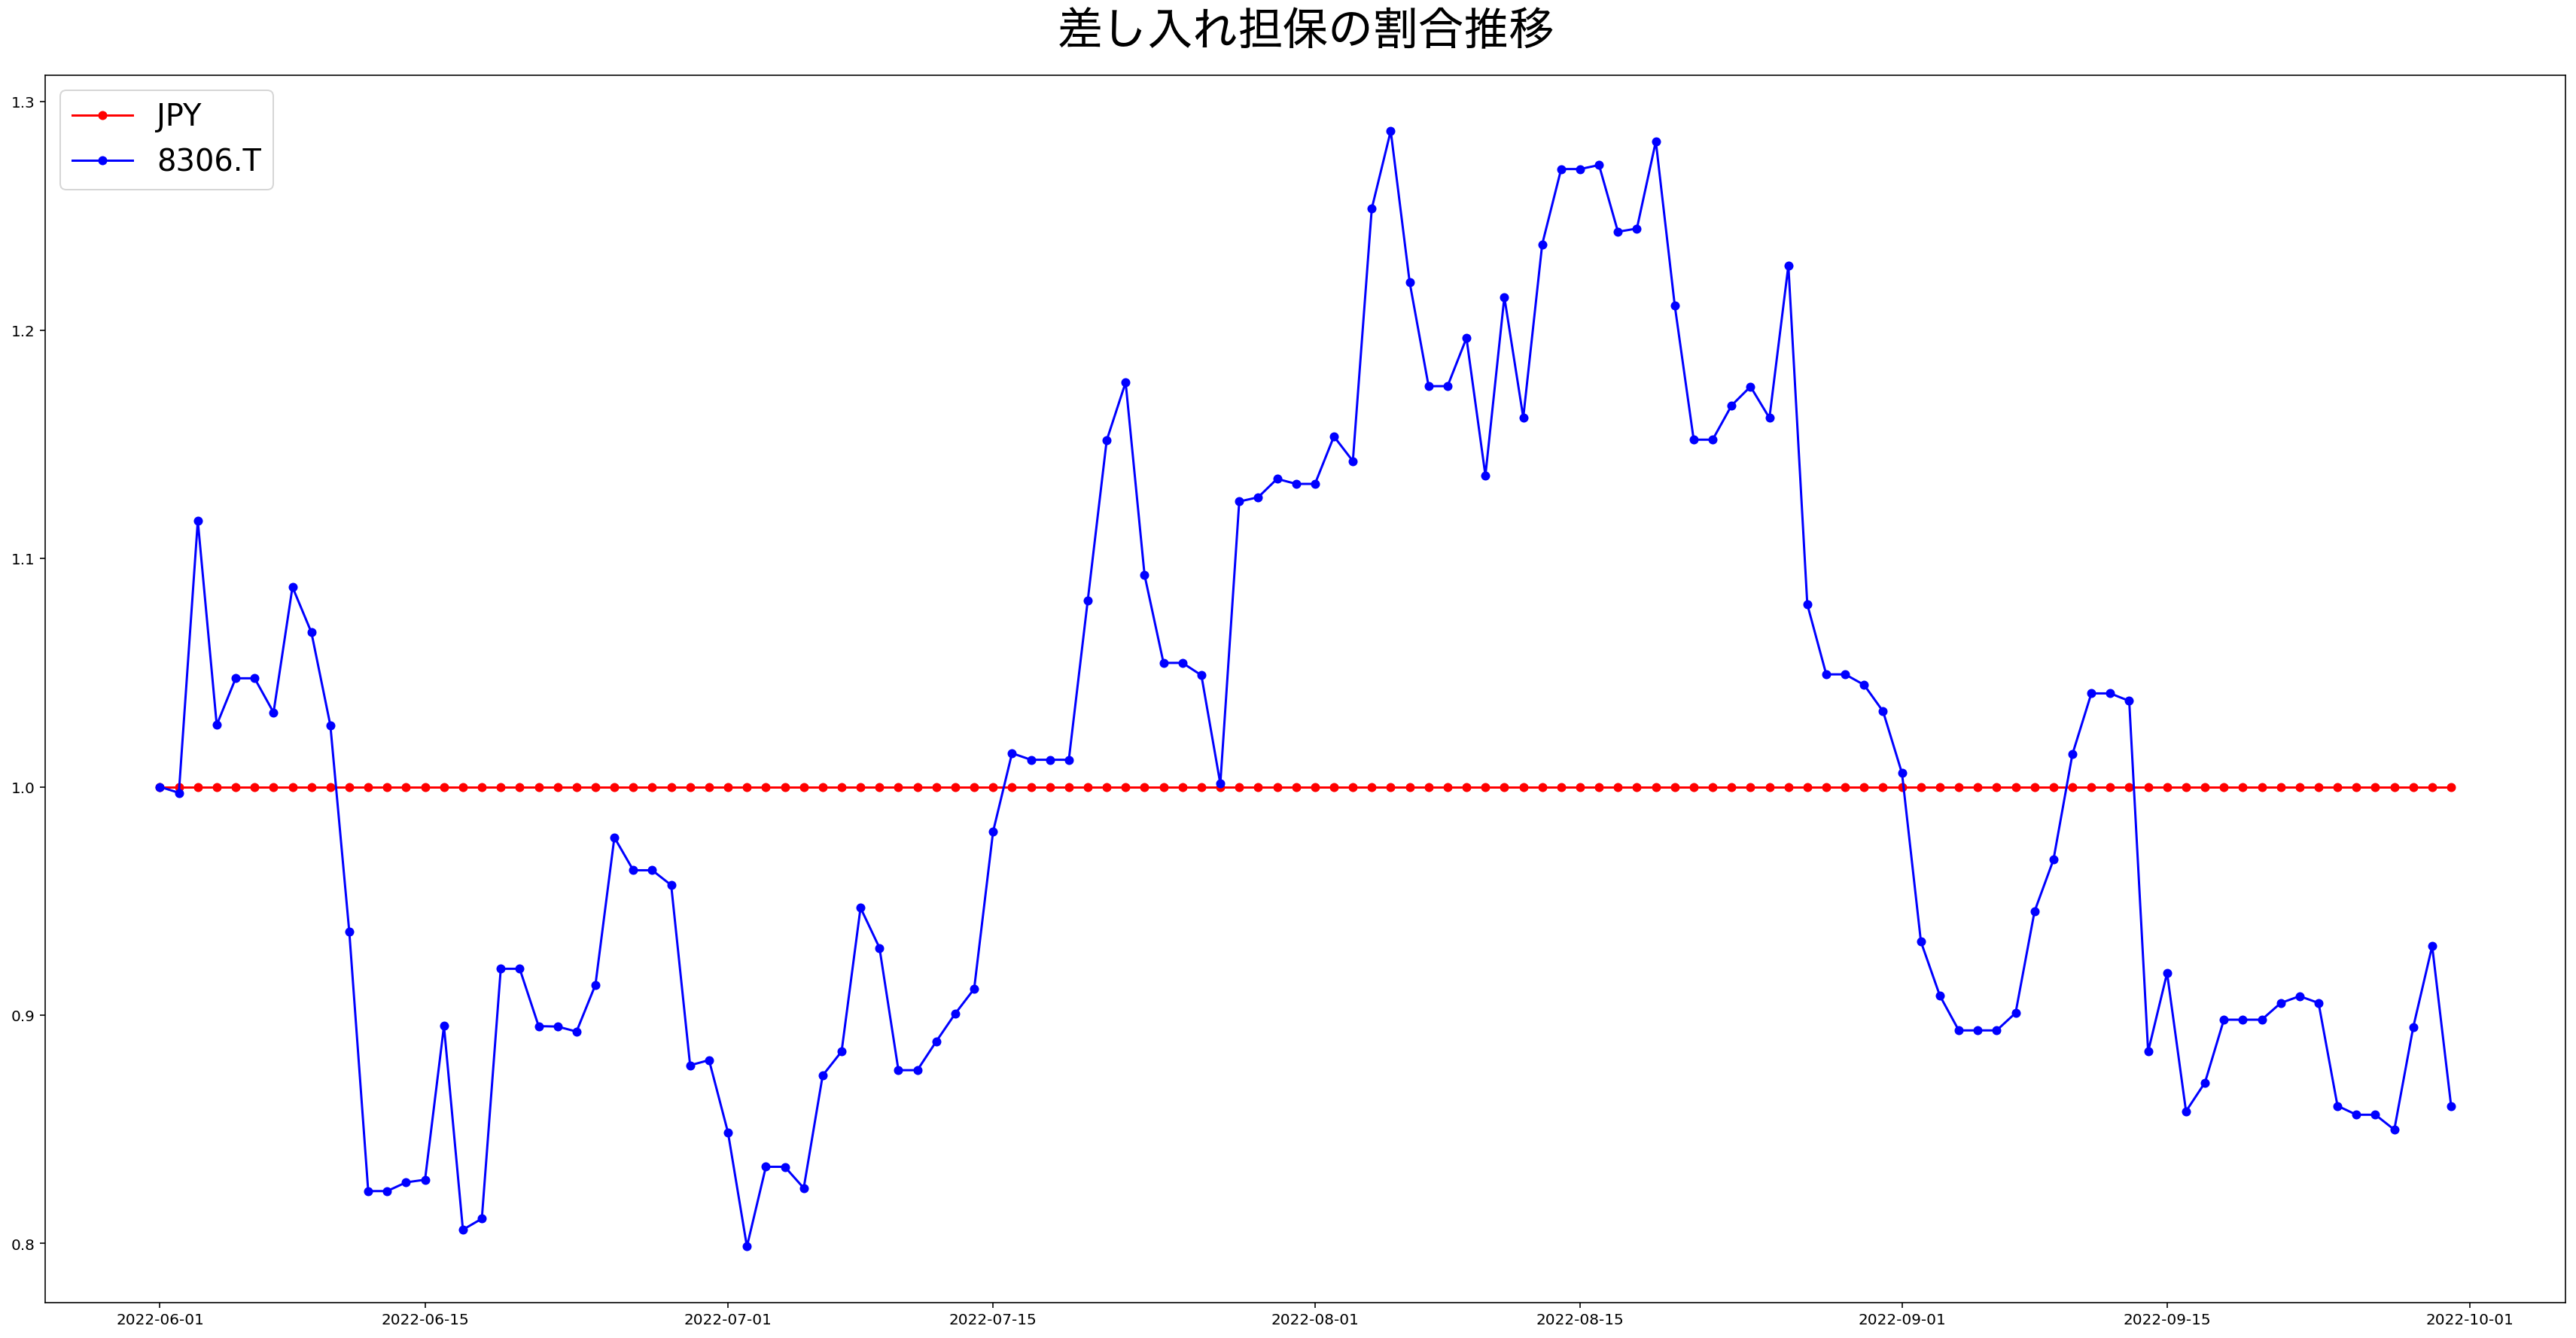

In [8]:
security_list = collateral_percentages.keys()
date_list = logs["date"]
color_list = ['red', 'blue', 'green']

plt.figure(figsize=(30, 15))
plt.title("差し入れ担保の割合推移", fontsize=30, pad=20, fontname="Hiragino Sans")
for idx, security in enumerate(security_list):
    plt.plot(date_list, collateral_percentages[security], marker='o', markersize=5, color=color_list[idx], label=security)
plt.legend(loc=2, fontsize=20)

In [9]:
logs['collateral_portfolio']

[{'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10},
  '8306.T': {'num': 141040, 'is_usd': False, 'price': 745.5, 'priority': 1}},
 {'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10},
  '8306.T': {'num': 140672, 'is_usd': False, 'price': 740.9, 'priority': 1}},
 {'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10},
  '8306.T': {'num': 157468, 'is_usd': False, 'price': 739.7, 'priority': 1}},
 {'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10},
  '8306.T': {'num': 144862, 'is_usd': False, 'price': 738.7, 'priority': 1}},
 {'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10},
  '8306.T': {'num': 147744, 'is_usd': False, 'price': 738.7, 'priority': 1}},
 {'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10},
  '8306.T': {'num': 147743, 'is_usd': False, 'price': 738.7, 'priority': 1}},
 {'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10},


In [20]:
for key, value in logs.items():
    print(f"{key}: {value[-1]}")
    print(":"*50)

date_list = logs['date']
collateral_portfolio_list = logs['collateral_portfolio']
collateral_sum_list = [portfolio_sum(log) for log in collateral_portfolio_list]
necessary_collateral_value_list = logs['necessary_collateral_value']
jct_portfolio_list = logs['jct_portfolio']
initial_collateral_portfolio_list = logs['initial_collateral_portfolio']
initial_collateral_value_list = [sum([security["num"] * security['price'] for security in portfolio.values()]) for portfolio in initial_collateral_portfolio_list]

pprint(initial_collateral_value_list)

date: 2022-09-30
::::::::::::::::::::::::::::::::::::::::::::::::::
st_total_value: 170522200.0
::::::::::::::::::::::::::::::::::::::::::::::::::
jct_total_value: 1265624924.5
::::::::::::::::::::::::::::::::::::::::::::::::::
jct_portfolio: {'JPY': {'num': 16599057, 'is_usd': False, 'priority': 10, 'price': 1.0}, '8306.T': {'num': 1853189, 'is_usd': False, 'priority': 1, 'price': 651.5}, '8604.T': {'num': 100000, 'is_usd': False, 'priority': 0, 'price': 478.3}}
::::::::::::::::::::::::::::::::::::::::::::::::::
collateral_portfolio: {'JPY': {'num': 83400943, 'is_usd': False, 'price': 1.0, 'priority': 10}, '8306.T': {'num': 146811, 'is_usd': False, 'price': 651.5, 'priority': 1}}
::::::::::::::::::::::::::::::::::::::::::::::::::
necessary_collateral_value: 179048310.0
::::::::::::::::::::::::::::::::::::::::::::::::::
initial_collateral_portfolio: {'JPY': {'num': 100000000, 'is_usd': False, 'price': 1.0, 'priority': 10}, '8306.T': {'num': 141885, 'is_usd': False, 'price': 651.5, 'pri

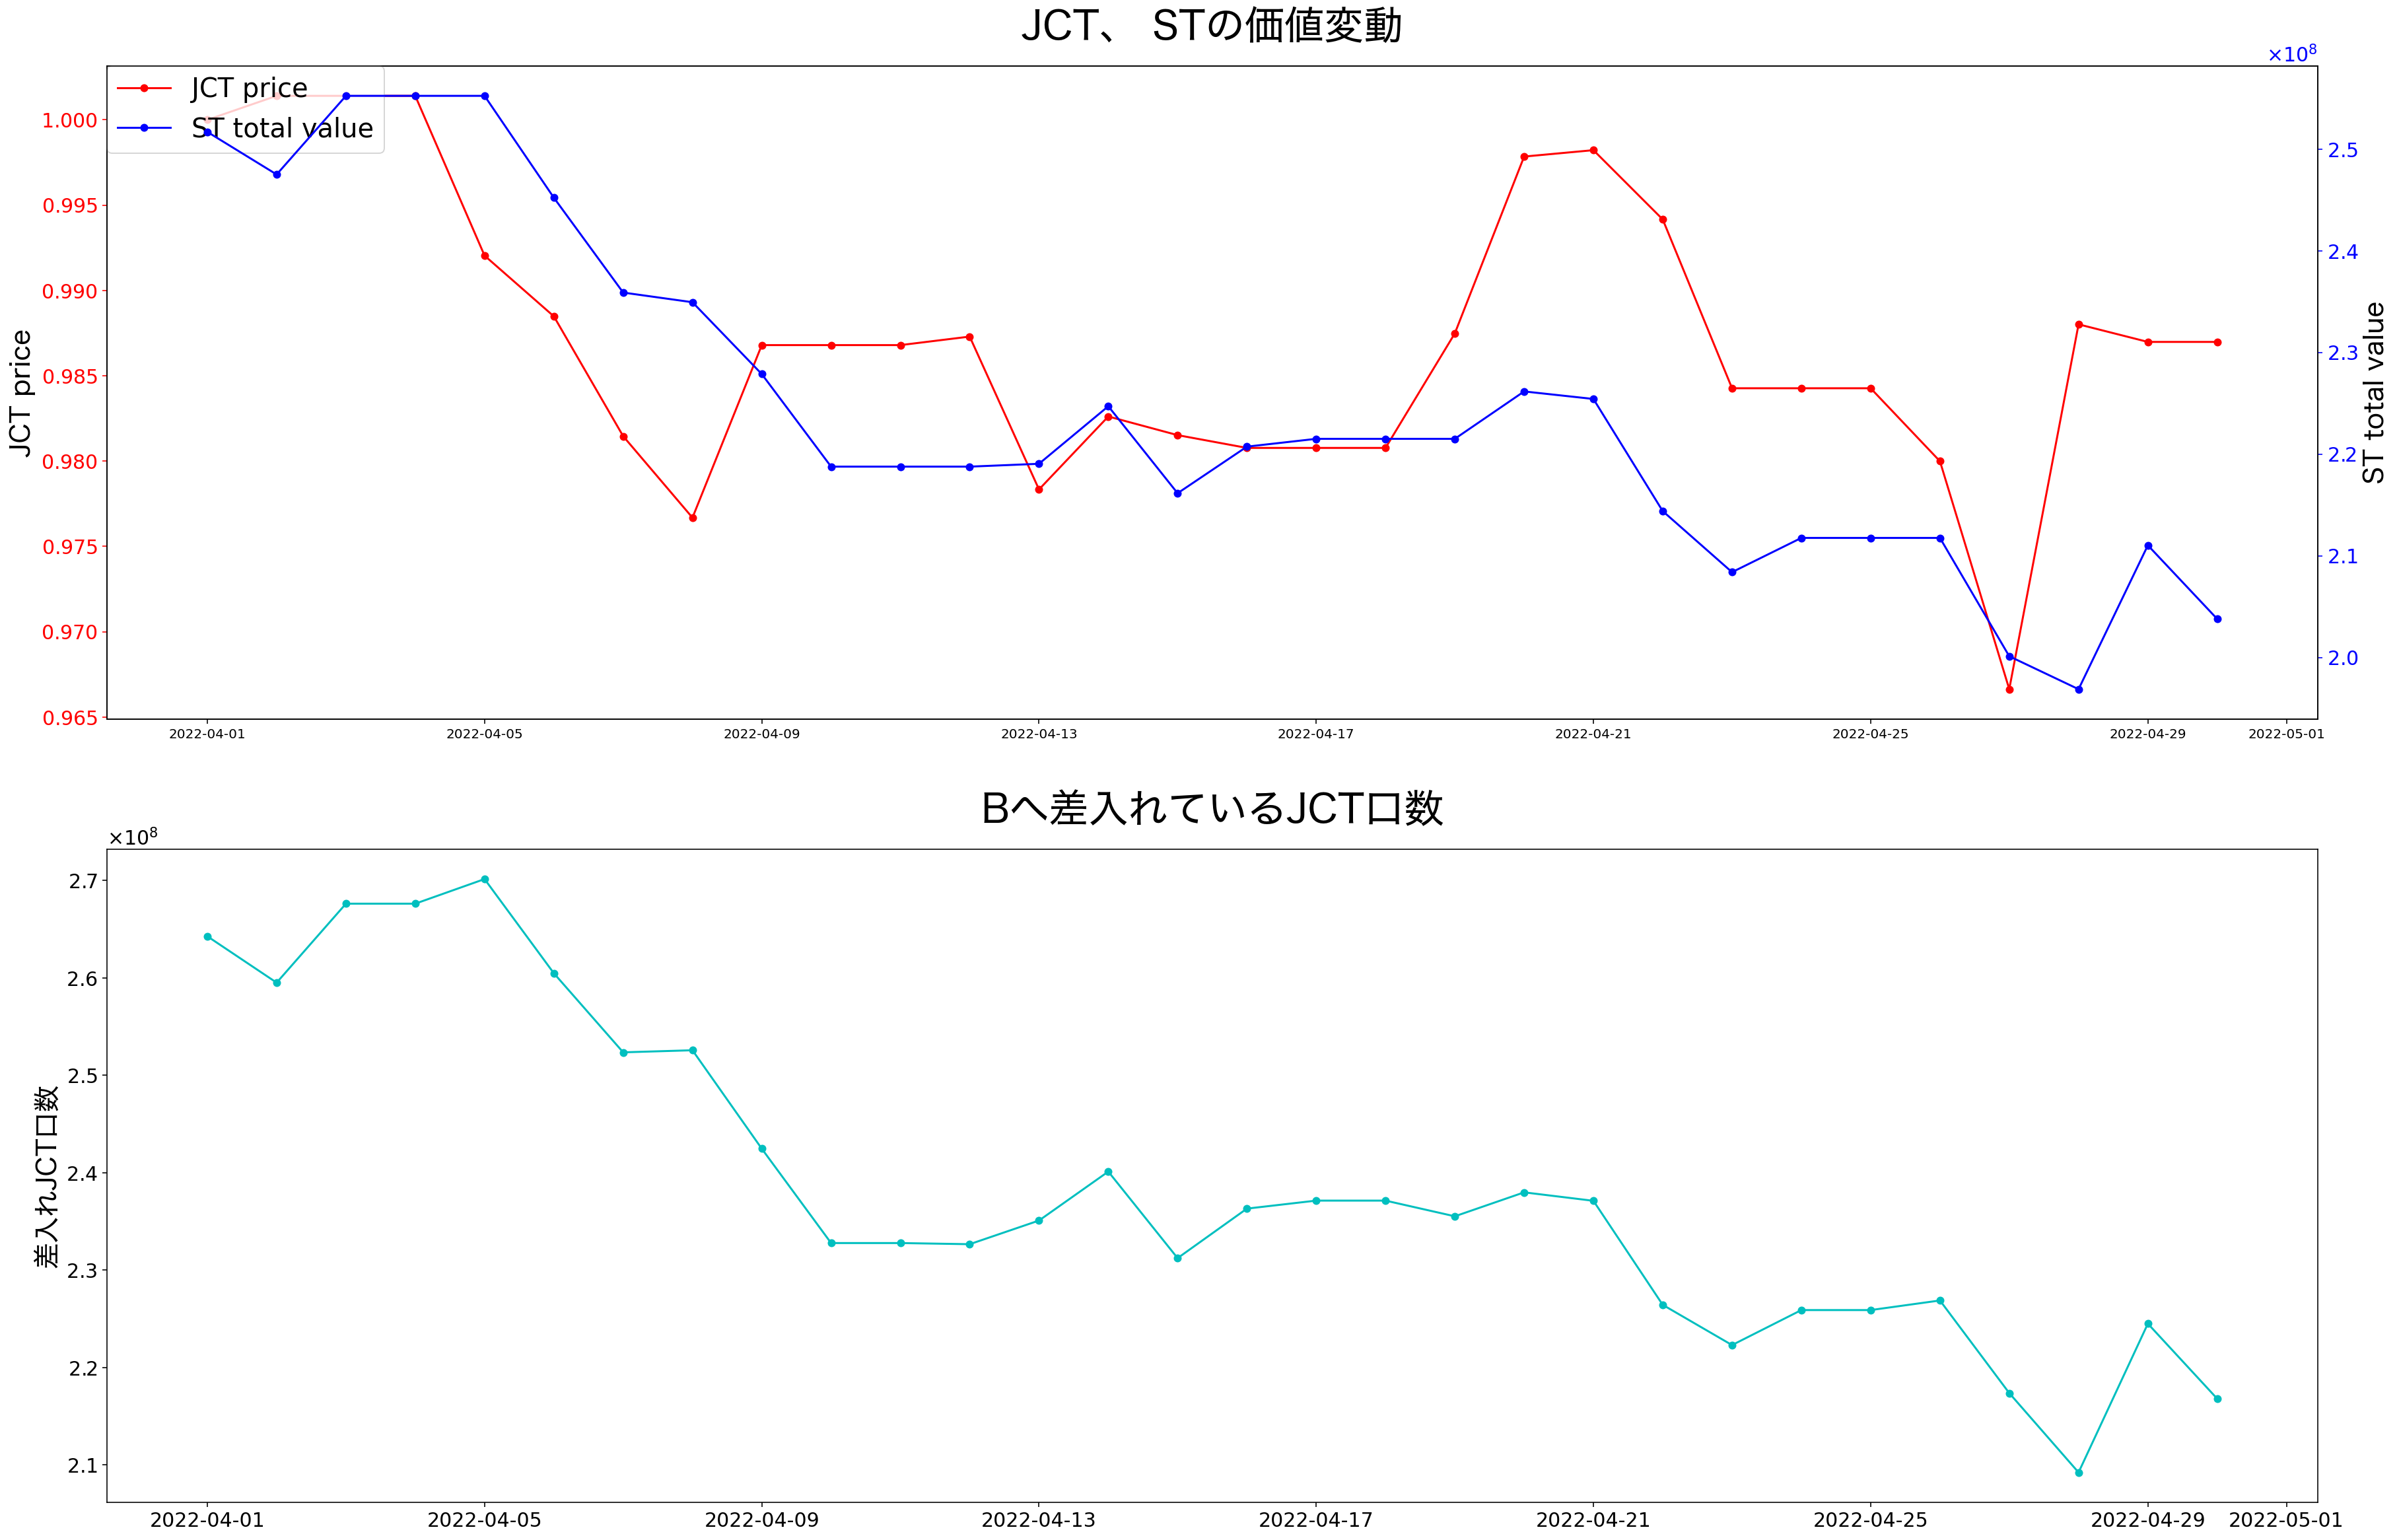

In [6]:
fig = plt.figure(figsize=(30,20))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_list, marker='o', markersize=5, color='red', label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_list, marker='o', markersize=5, color='blue', label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red', labelsize=15)
ax1.yaxis.offsetText.set_fontsize(15)
ax1.xaxis.offsetText.set_fontsize(15)
ax1_2.xaxis.offsetText.set_fontsize(15)
ax1_2.tick_params(axis='y', colors='blue', labelsize=15)
ax1_2.yaxis.offsetText.set_fontsize(15)
ax1.vlines(date_auto_deposit, min(jct_price_list), max(jct_price_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='c')
ax2.set_ylabel('差入れJCT口数', fontsize=20, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=15)
ax2.yaxis.offsetText.set_fontsize(15)
ax2.set_title('Bへ差入れているJCT口数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

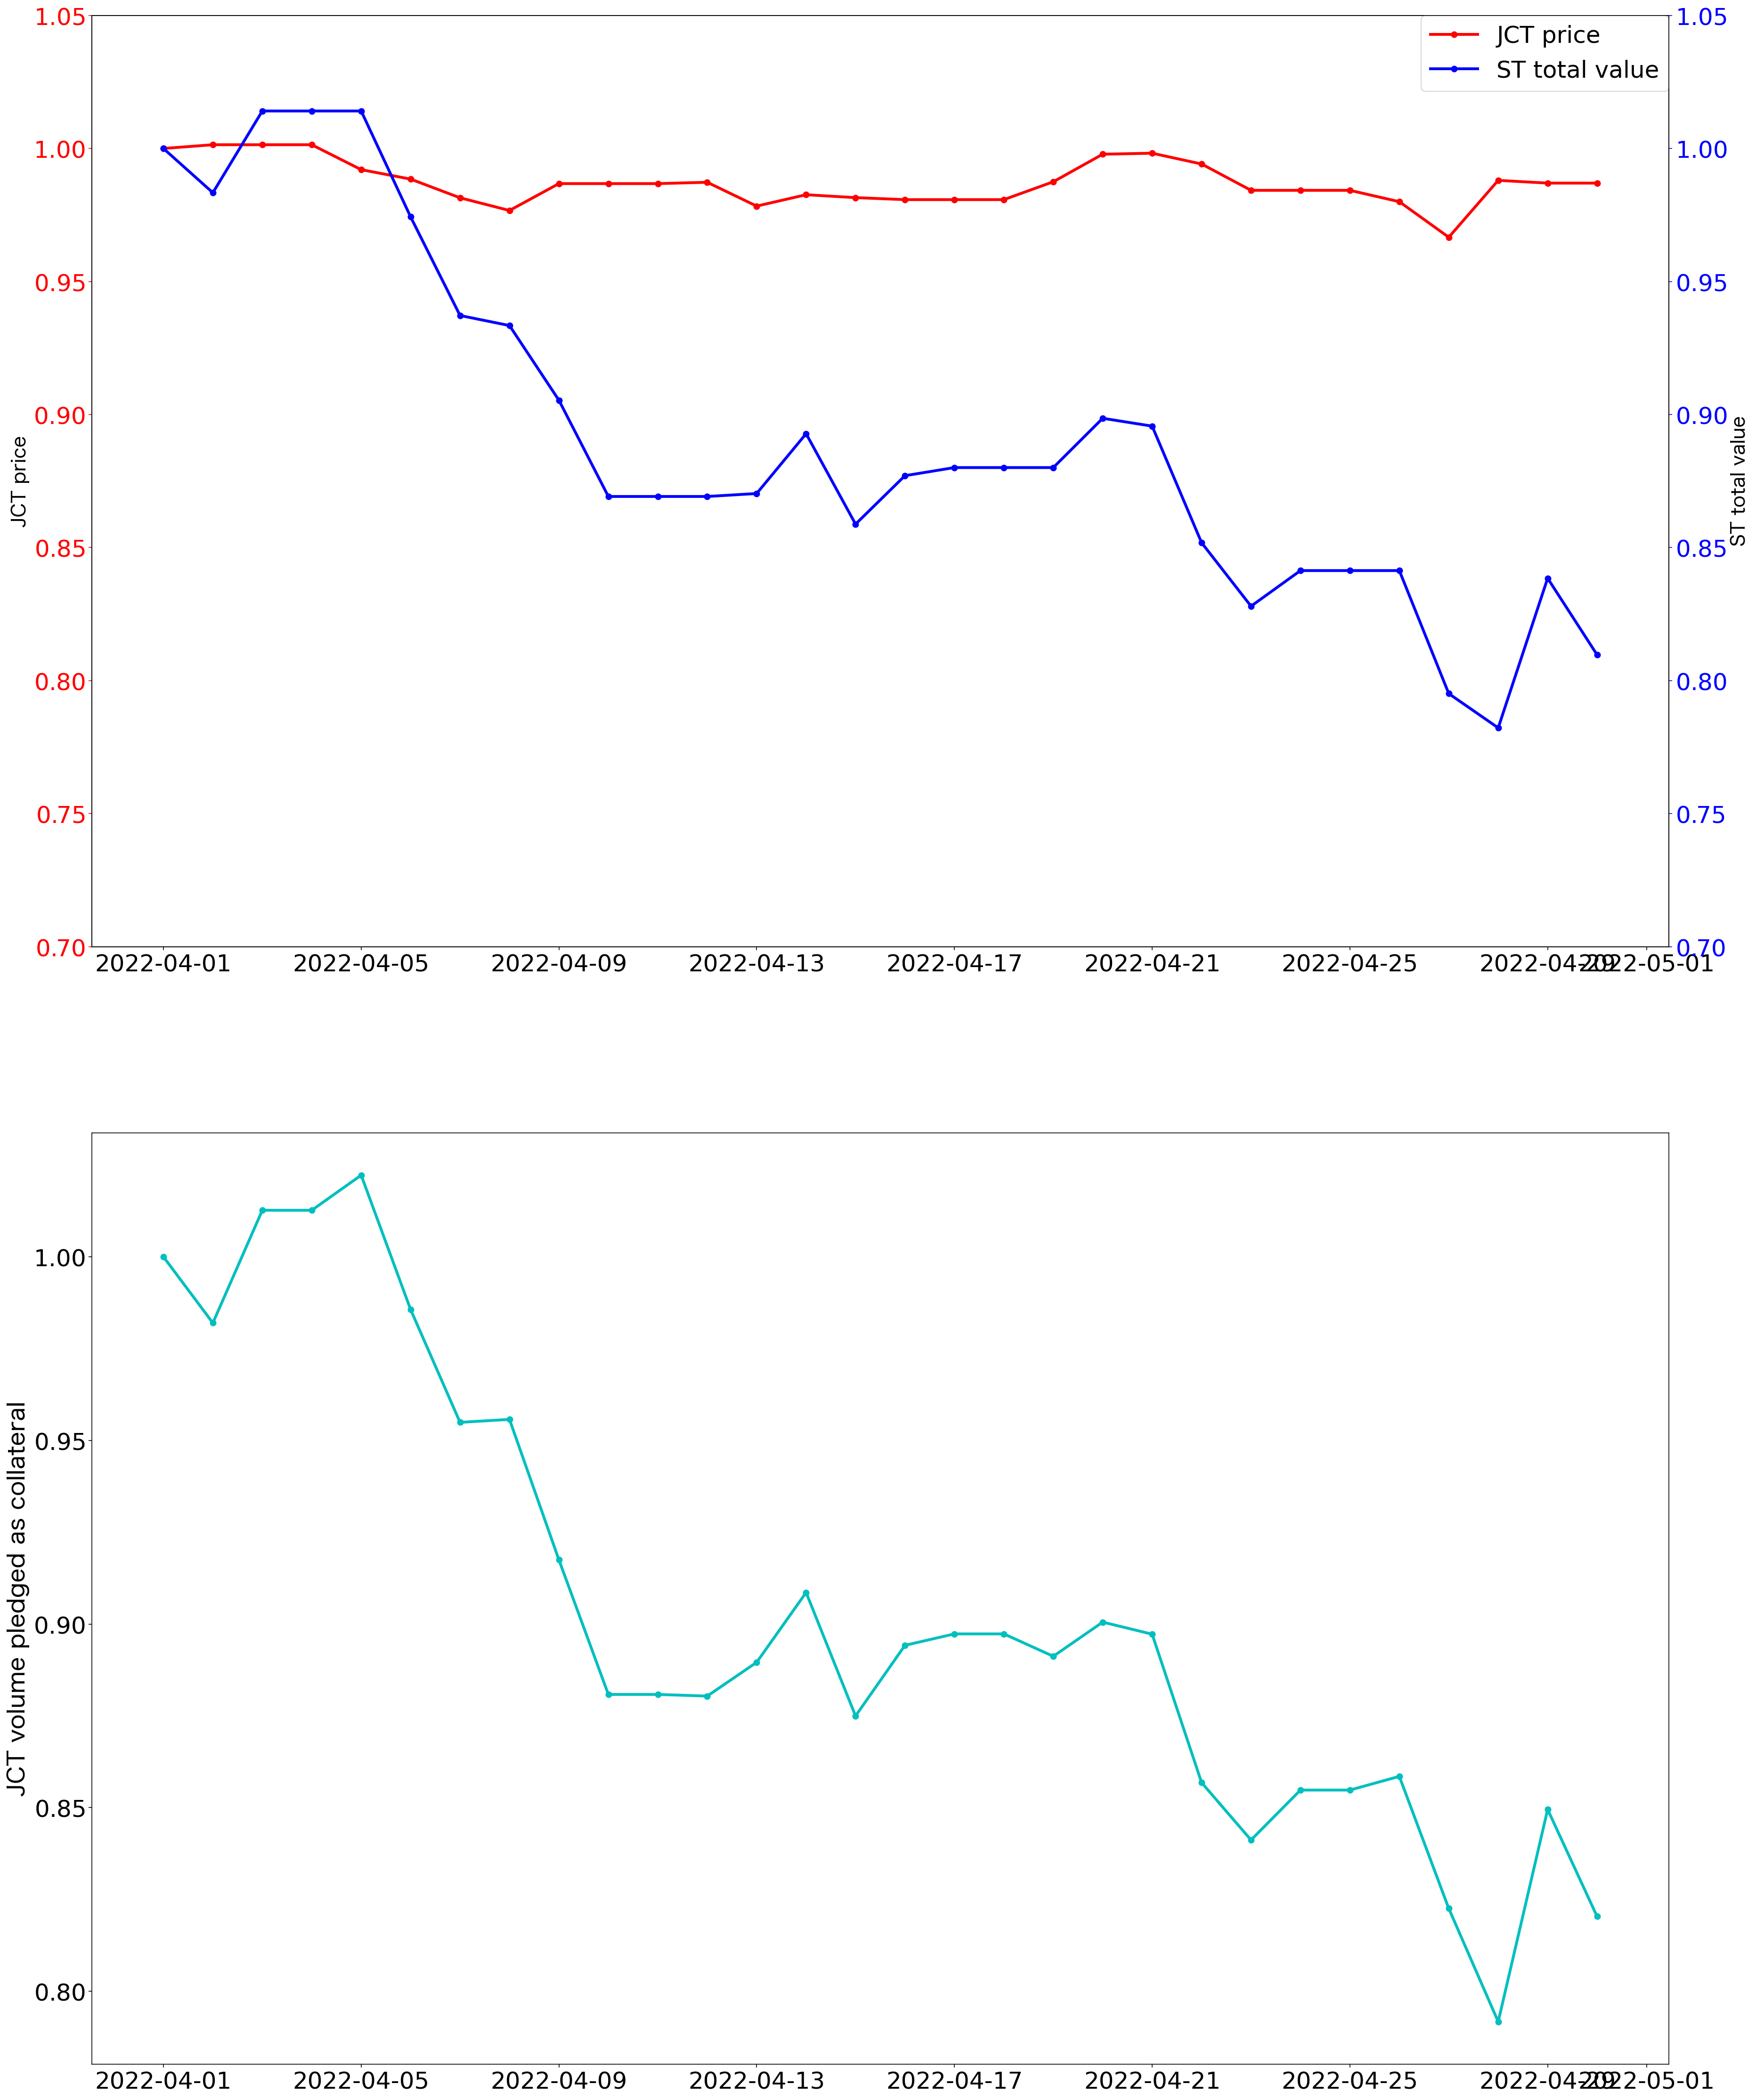

In [18]:
fig = plt.figure(figsize=(30,40))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1_2 = ax1.twinx()

# plt.title('JCT、 STの価値変動', fontsize=30, pad=20, fontname="Hiragino Sans")
ax1.plot(date_list, jct_price_change_list, marker='o', markersize=6, color='red', linewidth=3, label='JCT price')
ax1.set_ylabel('JCT price', fontsize=20, fontname="Hiragino Sans")
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1_2.plot(date_list, st_total_value_change_list, marker='o', markersize=6, color='blue', linewidth=3,  label='ST total value')
ax1_2.set_ylabel('ST total value', fontsize=20, fontname="Hiragino Sans")
ax1_2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.set_ylim(0.7, 1.05)
ax1_2.set_ylim(0.7, 1.05)
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax1_2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc='best', borderaxespad=0., fontsize=25)
ax1.tick_params(axis='y', colors='red', labelsize=25)
ax1.tick_params(axis='x', labelsize=25)
ax1.yaxis.offsetText.set_fontsize(25)
ax1.xaxis.offsetText.set_fontsize(25)
ax1_2.xaxis.offsetText.set_fontsize(25)
ax1_2.tick_params(axis='y', colors='blue', labelsize=25)
ax1_2.yaxis.offsetText.set_fontsize(25)
ax1.vlines(date_auto_deposit, min(jct_price_change_list), max(jct_price_change_list), color='orange', linestyle='dashed', linewidth=3)

ax2.plot(date_list, [num / lender_jct_num_list[0] for num in lender_jct_num_list], marker='o', markersize=6, linewidth=3, color='c')
ax2.set_ylabel('JCT volume pledged as collateral', fontsize=25, fontname="Hiragino Sans")
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.tick_params(labelsize=25)
ax2.yaxis.offsetText.set_fontsize(25)
# ax2.set_title('B社（有価証券の貸手）へ差入れているJCT口数', fontsize=30, pad=20, fontname="Hiragino Sans")
ax2.vlines(date_auto_deposit, min(lender_jct_num_list), max(lender_jct_num_list), color='orange', linestyle='dashed', linewidth=3)

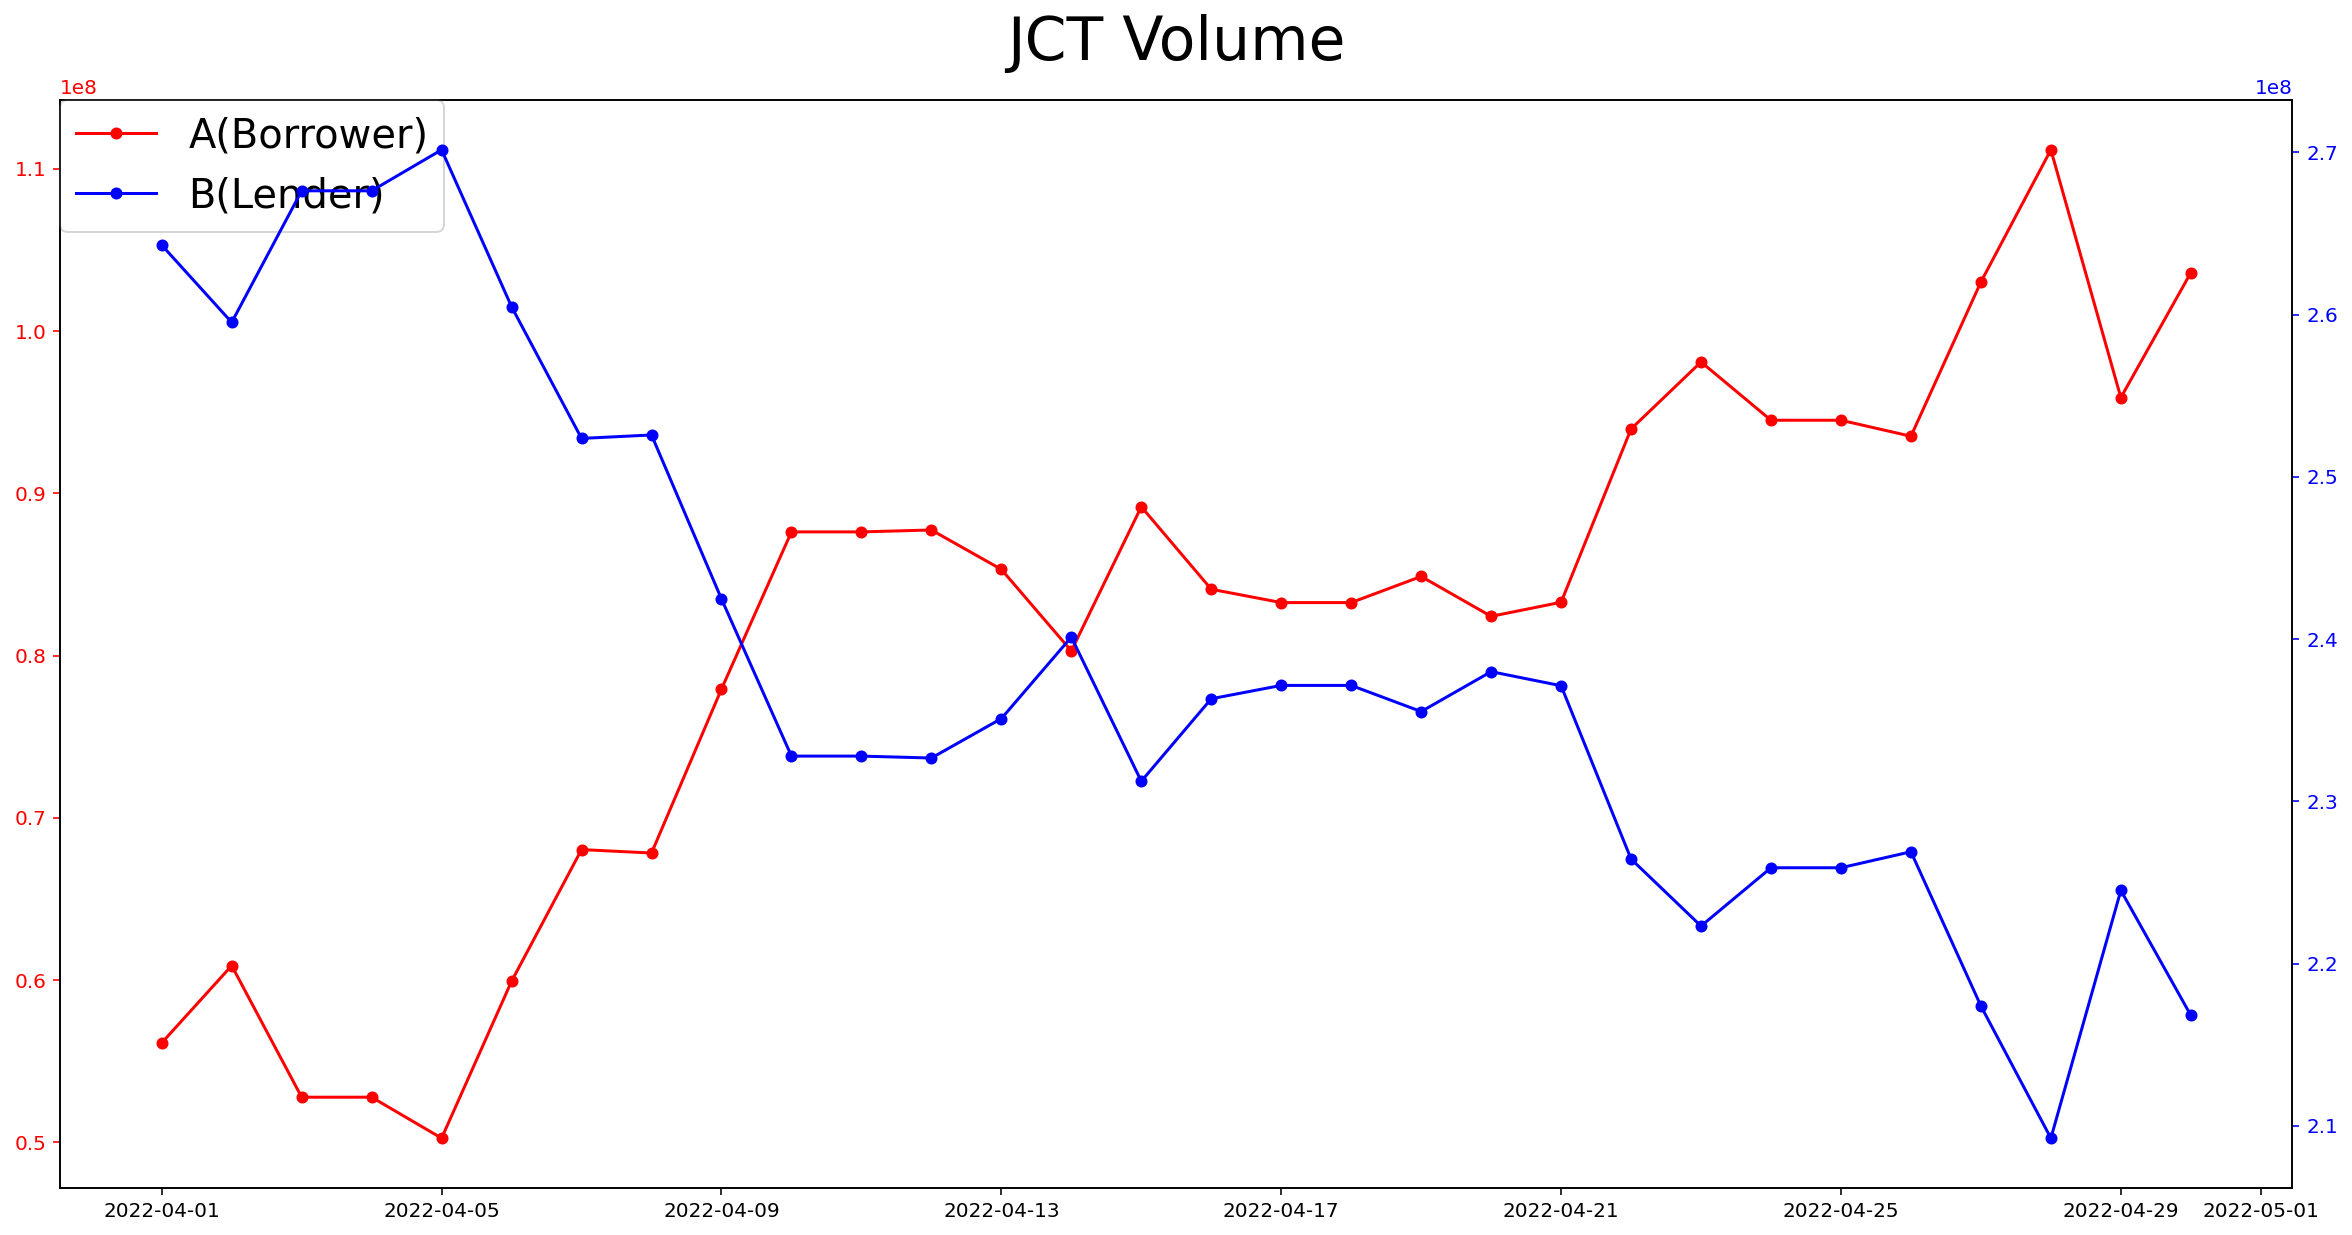

In [8]:
fig, ax1 = plt.subplots(figsize=(20,10))
ax2 = ax1.twinx()

plt.title('JCT Volume', fontsize=30, pad=20)
ax1.plot(date_list, borrower_jct_num_list, marker='o', markersize=5, color='red', label='A(Borrower)')
# ax1.set_ylabel()
ax2.plot(date_list, lender_jct_num_list, marker='o', markersize=5, color='blue', label='B(Lender)')
handler1, label1 = ax1.get_legend_handles_labels()
handler2, label2 = ax2.get_legend_handles_labels()

ax1.legend(handler1 + handler2, label1 + label2, loc=2, borderaxespad=0., fontsize=20)
ax1.tick_params(axis='y', colors='red')
ax2.tick_params(axis='y', colors='blue')

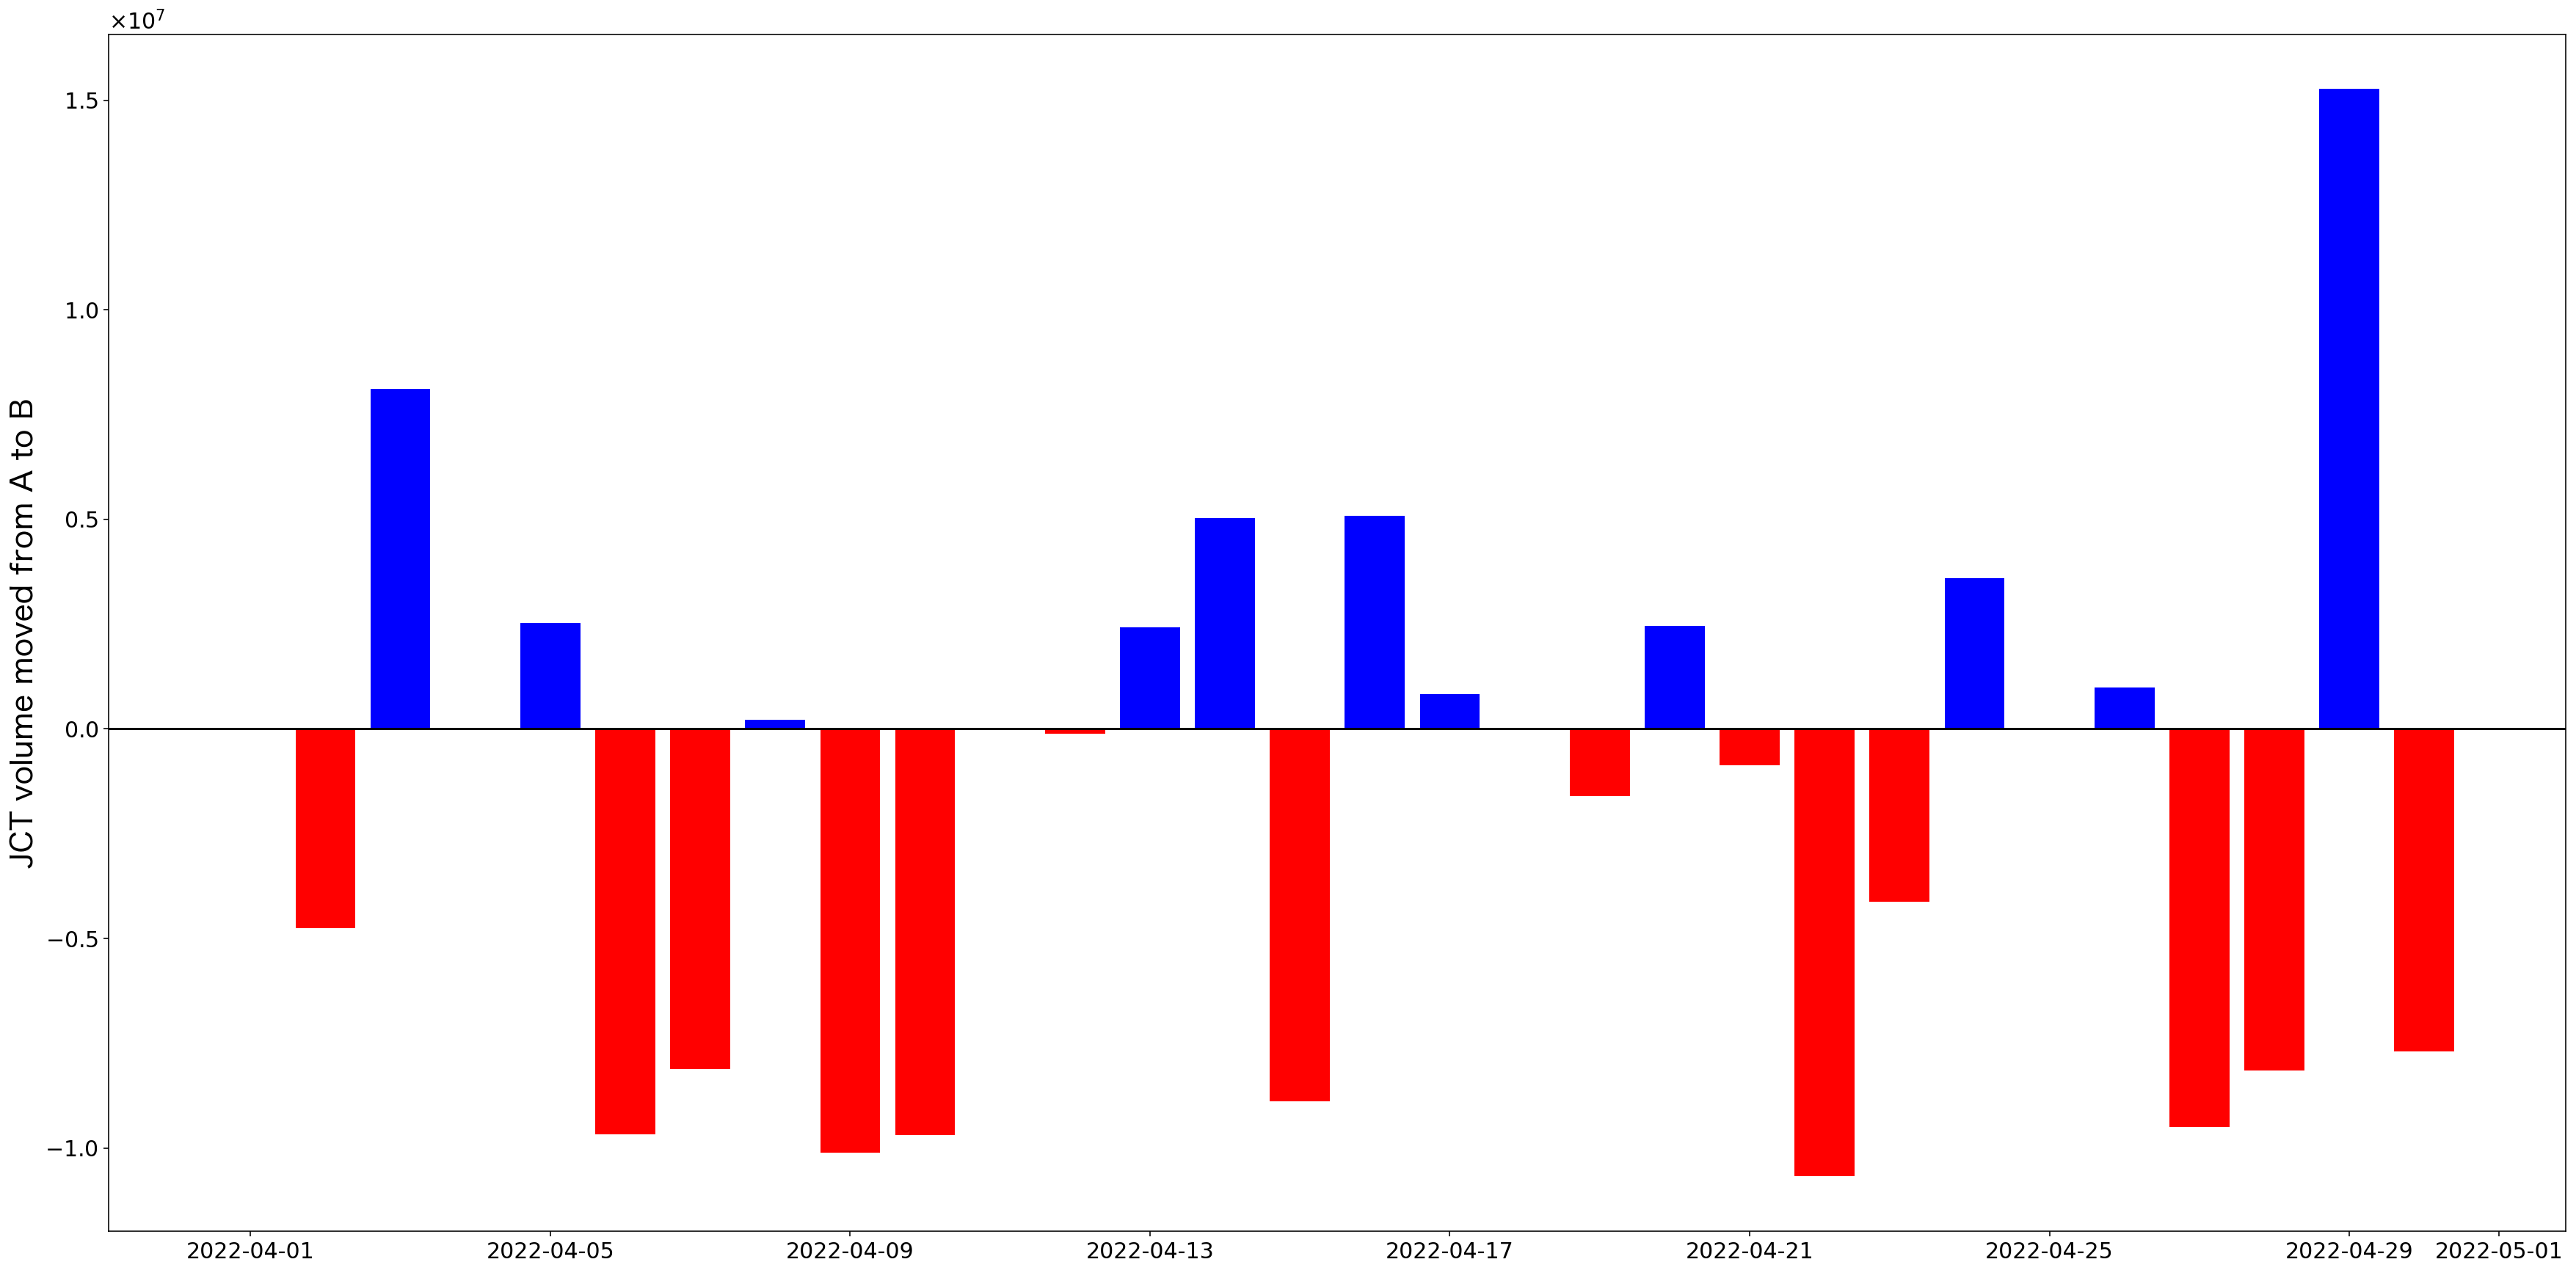

In [9]:
fig, ax = plt.subplots(figsize=(30,15))
jct_diff_num_color = ['blue' if diff > 0 else 'red' for diff in jct_diff_num_list]

ax.bar(date_list, jct_diff_num_list, color=jct_diff_num_color)
# ax.set_title('時価更新に伴い生じる JCT 移動（A → B）', fontsize=30, pad=20, fontname="Hiragino Sans")
ax.set_ylabel('JCT volume moved from A to B', fontsize=20, fontname='Hiragino Sans')
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.tick_params(labelsize=15)
ax.yaxis.offsetText.set_fontsize(15)
ax.axhline(0, color='black')
ax.vlines(date_auto_deposit, min(jct_diff_num_list), max(jct_diff_num_list), color='orange', linestyle='dashed', linewidth=3)